In [1]:
import pandas as pd
import numpy as np

In [2]:
MainData_path = 'IMA2025_Facebook_Aprilia_MainData.xlsx'
VideoComments_path = 'IMA2025_Facebook_Aprilia_VideoComments.xlsx'
MainData = pd.read_excel(MainData_path)
VideoComments = pd.read_excel(VideoComments_path)

# 🧹✨ **General EDA & Data Cleaning**

### 📊 Data Preparation and Organization

In this section, the initial dataframe has been reorganized to make the subsequent analysis more effective. Key operations include converting columns like **Racing**, **Events and Activities**, and **Accessories** into dummy variables and grouping Aprilia products based on motorcycle types. The product categories identified are:

- **Entry-Level:** Targeted at younger audiences or those purchasing their first bike. 🏍️
- **Core/Top Products:** High-performance models for which Aprilia is renowned and most appreciated by brand enthusiasts. 🏁
- **Urban:** A completely different segment, focused on daily commuting and practical use. 🛵

Another notable step was handling missing values in critical columns. This was done with the analysis in mind, even though some metrics like **Total Story Comments** or **Total Story Shares** were ultimately not included. Additionally, certain columns contained **NaNs** due to the nature of the media they represented. While replacing **NaNs** with zeroes is not necessarily incorrect, this step provided limited support in the end. 🤷‍♂️


In [3]:
MainData_adj = MainData.copy()

MainData_adj['Acc yes/no'] = MainData_adj['Accessories'].notna().astype(int)

MainData_adj['Event yes/no'] = MainData_adj['Events and Activities'].notna().astype(int)

MainData_adj['Racing yes/no'] = MainData_adj['Racing'].notna().astype(int)

MainData_adj = MainData_adj.drop(columns=['Accessories', 'Events and Activities', 'Racing'])


In [4]:
def classify_product_group(product):
    if pd.isna(product):
        return 0
    elif product in ['RS 457', 'Tuono 457', 'RS 125', 'Tuono 125', 'RX 125', 'SX 125', '125cc']:
        return 1  #entry level 
    elif product in ['RS660', 'Tuono 660', 'Tuono 660 Factory',
                     'RSV4', 'TuonoV4', 'Tuono V4 Factory SE-09 SBK',
                     'Tuareg 660', 'Tuareg Rally', 'Tuareg 660 Rally']:
        return 2 #core-top
    elif product in ['SXR', 'SR GT']:
        return 3 #urban
    else:
        return 0 

MainData_adj['Product group'] = MainData_adj['Product'].apply(classify_product_group)

MainData_adj = MainData_adj.drop(columns=['Product'])

In [5]:
media_unique = sorted(MainData_adj['Media'].dropna().unique())  

media_mapping = {val: i for i, val in enumerate(media_unique)}

MainData_adj['Media'] = MainData_adj['Media'].map(media_mapping)

#carousel = 0, link = 1, photo = 2, reel = 3, status = 4, video = 5

In [6]:
Start_df = MainData_adj[['Date', 'Time', 'Media',
       'Acc yes/no','Event yes/no', 'Racing yes/no', 'Product group',
       'Total interactions', 'Total reactions',
       'Total comments', 'Total shares', 'Engagements', 'Has paid',
       'Total reach', 'Total impressions', 'Impressions engagement rate',
       'Reach engagement rate', 'Total story comments', 'Total story shares', 'Post clicks',
       'Photo views', 'Link clicks', 'Other clicks','Video length (sec)', 'Video view count', 'Total video view time (sec)',
       'Completed video views', 'Average completion (%)', 'Average time watched (sec)',
       'Views - paid', 'Views - organic', 'Views - unique']]

In [7]:
cols_to_check = [
    'Total story comments', 'Total story shares', 'Post clicks',
    'Photo views', 'Link clicks', 'Other clicks', 
]

video_cols_to_check = [
    'Video length (sec)', 'Video view count', 'Total video view time (sec)',
    'Completed video views', 'Average completion (%)',
    'Average time watched (sec)', 'Views - paid', 'Views - organic',
    'Views - unique'
]


# Mappatura inversa dei codici media (da numeri a etichette testuali)
media_inverse_map = {
    0: 'carousel',
    1: 'link',
    2: 'photo',
    3: 'reel',
    4: 'status',
    5: 'video'
}

# Loop su ogni metrica
for col in cols_to_check + video_cols_to_check:
    nan_df = Start_df[Start_df[col].isna()]
    media_nan_counts = nan_df['Media'].value_counts().sort_index()

    print(f"\n📉 NaN in '{col}' per tipo di media:")
    for media_code, count in media_nan_counts.items():
        media_label = media_inverse_map.get(media_code, f'Unknown ({media_code})')
        print(f"– {media_label}: {count} NaN")


📉 NaN in 'Total story comments' per tipo di media:
– carousel: 1 NaN
– photo: 64 NaN
– reel: 1 NaN
– status: 7 NaN
– video: 36 NaN

📉 NaN in 'Total story shares' per tipo di media:
– photo: 32 NaN
– status: 6 NaN
– video: 10 NaN

📉 NaN in 'Post clicks' per tipo di media:
– reel: 12 NaN

📉 NaN in 'Photo views' per tipo di media:
– carousel: 1 NaN
– link: 4 NaN
– reel: 12 NaN
– status: 9 NaN
– video: 420 NaN

📉 NaN in 'Link clicks' per tipo di media:
– photo: 517 NaN
– reel: 12 NaN
– status: 5 NaN
– video: 227 NaN

📉 NaN in 'Other clicks' per tipo di media:
– reel: 12 NaN
– status: 6 NaN

📉 NaN in 'Video length (sec)' per tipo di media:
– carousel: 1 NaN
– link: 4 NaN
– photo: 703 NaN
– status: 9 NaN

📉 NaN in 'Video view count' per tipo di media:
– carousel: 1 NaN
– link: 4 NaN
– photo: 703 NaN
– status: 9 NaN

📉 NaN in 'Total video view time (sec)' per tipo di media:
– carousel: 1 NaN
– link: 4 NaN
– photo: 703 NaN
– status: 9 NaN
– video: 2 NaN

📉 NaN in 'Completed video views' per t

In [8]:
cols_to_fill = [
    'Total story comments', 'Total story shares', 'Post clicks',
    'Photo views', 'Link clicks', 'Other clicks',
    'Video length (sec)', 'Video view count', 'Total video view time (sec)',
    'Completed video views', 'Average completion (%)',
    'Average time watched (sec)', 'Views - paid', 'Views - organic',
    'Views - unique'
]

print("Zeros in these columns (for imputation):")
for col in cols_to_fill:
    zero_count = (Start_df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros")


Zeros in these columns (for imputation):
Total story comments: 0 zeros
Total story shares: 0 zeros
Post clicks: 4 zeros
Photo views: 0 zeros
Link clicks: 0 zeros
Other clicks: 0 zeros
Video length (sec): 1 zeros
Video view count: 1 zeros
Total video view time (sec): 0 zeros
Completed video views: 4 zeros
Average completion (%): 0 zeros
Average time watched (sec): 0 zeros
Views - paid: 329 zeros
Views - organic: 1 zeros
Views - unique: 0 zeros


In [9]:
cols_to_fill = [
    'Total story comments', 'Total story shares', 'Post clicks',
    'Photo views', 'Link clicks', 'Other clicks',
]


Start_df[cols_to_fill] = Start_df[cols_to_fill].fillna(0)


C:\Users\matte\AppData\Local\Temp\ipykernel_2396\4231461588.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Start_df[cols_to_fill] = Start_df[cols_to_fill].fillna(0)


### 📊 Paid vs. Organic Content: A Closer Look

In the second part of this section, the focus shifts to some graphical insights regarding the differences between **paid** and **organic** content. Before analyzing whether boosting posts actually benefits Aprilia, it's interesting to note that around **80%** of Aprilia's online content is organic, indicating a significant yet selective use of paid promotion. 📈

One of the standout findings is the distinct distribution of **paid** vs. **organic** content between posts that **showcase products** and those that don't. Specifically:

- **Product Posts:** Approximately **45%** are paid, reflecting a clear emphasis on promoting actual bikes. 💥  
- **Non-Product Posts:** Only **11%** fall under the paid category, suggesting a more conservative approach to boosting content without direct product focus. 🚫

Breaking it down by product category:

- **Core/Top Products:** This category stands out, with a large absolute volume of posts, **43%** of which are paid, highlighting the brand's strategic push for its flagship models. 🏁  
- **Urban:** Shows a similar percentage of paid content, though from a much smaller base, aligning with a niche yet consistent promotional effort. 🚦  
- **Entry-Level:** The most striking result here is that **57%** of this content is paid, emphasizing Aprilia's clear strategy to invest in reaching younger riders and first-time buyers. 🔥

These insights provide a clearer picture of Aprilia's paid content strategy, suggesting a strong focus on showcasing its iconic models while also investing in the next generation of riders. 🚀


C:\Users\matte\AppData\Local\Temp\ipykernel_2396\1541969967.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=labels, y=paid_counts.values, palette='pastel')


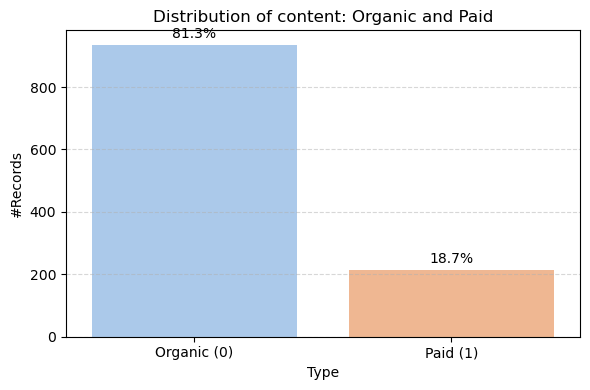

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


paid_counts = Start_df['Has paid'].value_counts().sort_index()
total = paid_counts.sum()
percentages = (paid_counts / total * 100).round(1)


labels = ['Organic (0)', 'Paid (1)']


plt.figure(figsize=(6, 4))
bars = sns.barplot(x=labels, y=paid_counts.values, palette='pastel')


for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + total * 0.01,
             f'{percentages.iloc[i]}%', ha='center', va='bottom', fontsize=10)


plt.title('Distribution of content: Organic and Paid')
plt.ylabel('#Records')
plt.xlabel('Type')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()


plt.show()


In [11]:
import pandas as pd

product_paid_counts = Start_df[Start_df['Has paid'] == 1]['Product group'].value_counts().sort_index()
product_organic_counts = Start_df[Start_df['Has paid'] == 0]['Product group'].value_counts().sort_index()

product_group_abs_counts = pd.DataFrame({
    'Paid': product_paid_counts,
    'Organic': product_organic_counts
}).fillna(0).astype(int)

# Visualizzazione tabellare
print("📊 Conteggi assoluti per ciascun Product group (Paid vs Organic):")
display(product_group_abs_counts)


📊 Conteggi assoluti per ciascun Product group (Paid vs Organic):


,Paid,Organic
Product group,,
0,102,799
1,25,19
2,83,110
3,5,7


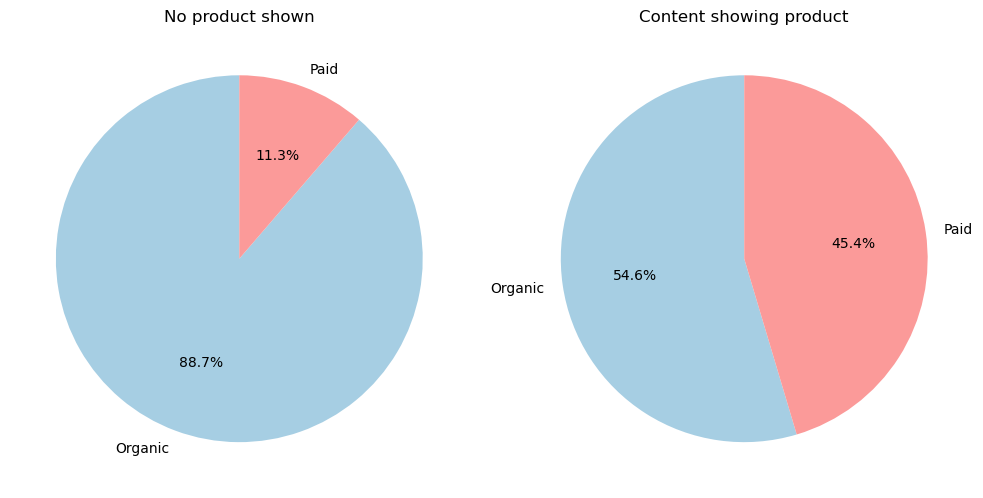

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtra i due gruppi
unclassified = Start_df[Start_df['Product group'] == 0]
classified = Start_df[Start_df['Product group'].isin([1, 2, 3])]

# Conta Paid vs Organic in ciascun gruppo
counts_unclassified = unclassified['Has paid'].value_counts().sort_index()
counts_classified = classified['Has paid'].value_counts().sort_index()

# Etichette leggibili
labels = ['Organic', 'Paid']
colors = ['#a6cee3', '#fb9a99']

# Plot: due grafici a torta affiancati
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Torta 1: Unclassified
axes[0].pie(counts_unclassified, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0].set_title('No product shown')

# Torta 2: Classified (1-2-3)
axes[1].pie(counts_classified, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Content showing product')

plt.tight_layout()
plt.show()


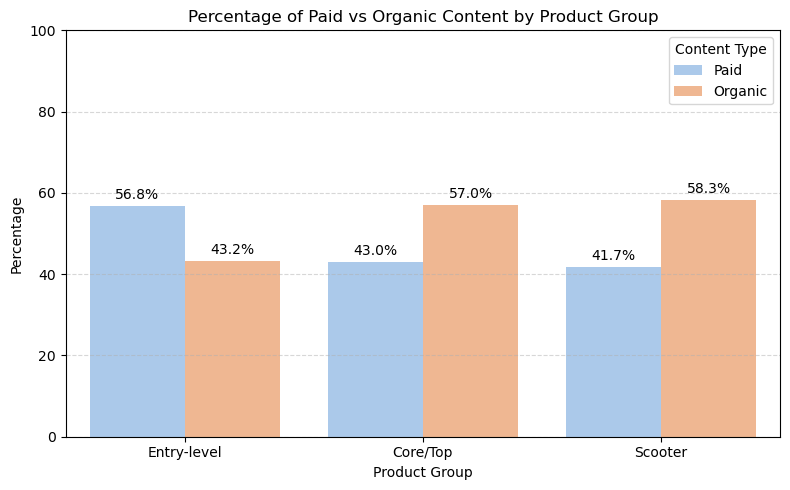

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dati iniziali
data = {
    'Product group': ['Entry-level', 'Core/Top', 'Scooter'],
    'Paid': [25, 83, 5],
    'Organic': [19, 110, 7]
}
df = pd.DataFrame(data)

# Calcolo percentuali
df['Total'] = df['Paid'] + df['Organic']
df['% Paid'] = (df['Paid'] / df['Total'] * 100).round(1)
df['% Organic'] = (df['Organic'] / df['Total'] * 100).round(1)

# Riformatta per grafico
df_long = pd.melt(df, id_vars='Product group', value_vars=['% Paid', '% Organic'],
                  var_name='Type', value_name='Percentage')

# Etichette leggibili
type_labels = {'% Paid': 'Paid', '% Organic': 'Organic'}
df_long['Type'] = df_long['Type'].map(type_labels)

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_long, x='Product group', y='Percentage', hue='Type', palette='pastel')

# Etichette sopra le barre (niente 0.0%)
for bar in ax.patches:
    height = bar.get_height()
    if height > 0.5:  # mostra etichetta solo se visibile
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            f'{height:.1f}%',
            ha='center',
            va='bottom',
            fontsize=10
        )

# Personalizzazione grafico
plt.title('Percentage of Paid vs Organic Content by Product Group')
plt.ylabel('Percentage')
plt.xlabel('Product Group')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()


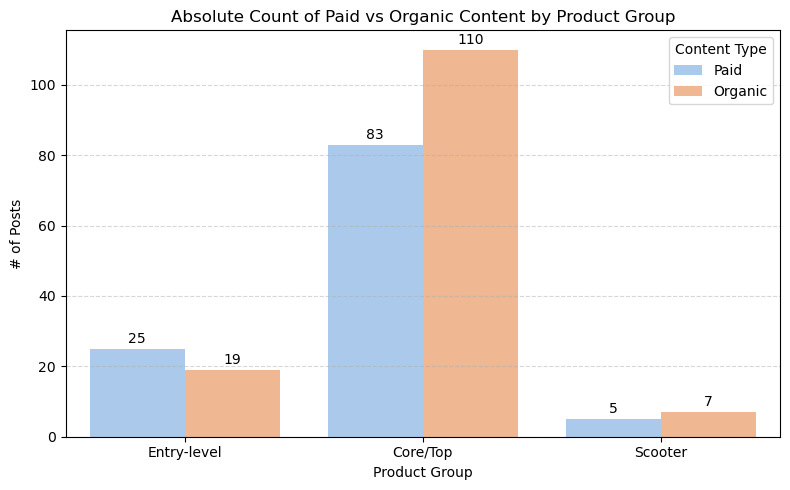

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dati iniziali
data = {
    'Product group': ['Entry-level', 'Core/Top', 'Scooter'],
    'Paid': [25, 83, 5],
    'Organic': [19, 110, 7]
}
df = pd.DataFrame(data)

# Riformattazione long format per il grafico
df_long = pd.melt(df, id_vars='Product group', value_vars=['Paid', 'Organic'],
                  var_name='Type', value_name='Count')

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_long, x='Product group', y='Count', hue='Type', palette='pastel')

# Aggiungi etichette con valori assoluti sopra le barre
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.8,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10
        )

# Estetica
plt.title('Absolute Count of Paid vs Organic Content by Product Group')
plt.ylabel('# of Posts')
plt.xlabel('Product Group')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()


### 📅 Monthly and Hourly Trends for Paid Content + Some other considerations

When looking at the **percentage of paid posts per month**, no clear long-term trends emerge, but a few interesting peaks are worth noting. 

- **February Spike:** There's a noticeable increase in paid content in **February**, likely reflecting the approach of spring when potential buyers start considering motorcycle purchases. 🌱  
- **End-of-Year Peaks:** There's also a significant surge in **November 2024** and **December 2024**, though this is less pronounced in absolute terms. This discrepancy is due to a general decline in overall social activity during these months, despite a consistent number of paid posts. Interestingly, the absolute count of paid posts seems to follow a **cyclical pattern**, with quieter months often followed by more active ones. 🔄

In terms of **hourly distribution**, a few patterns stand out:

- **Morning:** Most posts are concentrated around **9:30** and **11:30**, likely aiming to capture the morning traffic. ☀️  
- **Afternoon:** There's a less pronounced but more evenly distributed peak around mid-afternoon. 🌆  

When we consider the **proportion** of paid content by time of day:

- **Morning Peaks:** Again, the highest concentrations are around **9:30** and **11:30**.  
- **Afternoon:** More uniform distribution, without a single standout peak. 📊  

Finally, it's worth highlighting that:

- **Racing Content:** Has a much lower proportion of paid posts (**5%**) compared to non-racing content (**36%**), possibly reflecting a more organic community-driven approach to this category. 🏁  
- **Accessories:** Show a less extreme but similar pattern, with fewer boosted posts compared to content without accessories. 🎒

These insights help paint a more detailed picture of Aprilia's social media strategy, highlighting both timing and content-type differences in paid post distribution. 🔎


C:\Users\matte\AppData\Local\Temp\ipykernel_2396\1065918603.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Start_df['Date'] = pd.to_datetime(Start_df['Date'])
C:\Users\matte\AppData\Local\Temp\ipykernel_2396\1065918603.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Start_df['YearMonth'] = Start_df['Date'].dt.to_period('M')
C:\Users\matte\AppData\Local\Temp\ipykernel_2396\1065918603.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

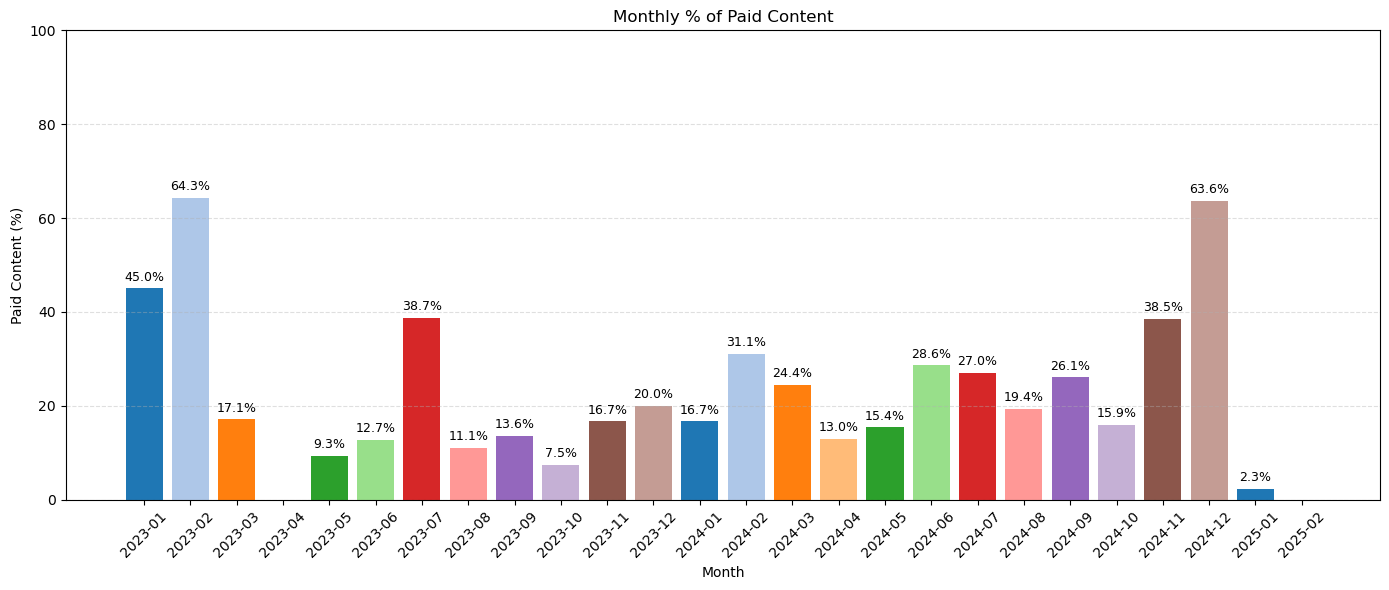

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Assicurati che la colonna 'Date' sia in formato datetime
Start_df['Date'] = pd.to_datetime(Start_df['Date'])

# Estrai mese e anno
Start_df['YearMonth'] = Start_df['Date'].dt.to_period('M')
Start_df['Month'] = Start_df['Date'].dt.month

# Calcolo % paid per mese
monthly_counts = Start_df.groupby(['YearMonth', 'Month'])['Has paid'].agg(['sum', 'count']).reset_index()
monthly_counts['% Paid'] = (monthly_counts['sum'] / monthly_counts['count'] * 100).round(1)
monthly_counts['YearMonth'] = monthly_counts['YearMonth'].astype(str)

# Colori coerenti per stesso mese
color_palette = sns.color_palette("tab20", 12)  # 12 mesi
monthly_counts['Color'] = monthly_counts['Month'].apply(lambda m: color_palette[m - 1])
month_labels = [calendar.month_abbr[m] for m in monthly_counts['Month']]

# Plot
plt.figure(figsize=(14, 6))
bars = plt.bar(monthly_counts['YearMonth'], monthly_counts['% Paid'], color=monthly_counts['Color'])

# Etichette percentuali sopra le barre
for bar, value in zip(bars, monthly_counts['% Paid']):
    if value > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, value + 1, f'{value}%', ha='center', va='bottom', fontsize=9)

# Titoli e stile
plt.title('Monthly % of Paid Content')
plt.ylabel('Paid Content (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


C:\Users\matte\AppData\Local\Temp\ipykernel_2396\1208696518.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Start_df['Date'] = pd.to_datetime(Start_df['Date'])
C:\Users\matte\AppData\Local\Temp\ipykernel_2396\1208696518.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Start_df['YearMonth'] = Start_df['Date'].dt.to_period('M').astype(str)


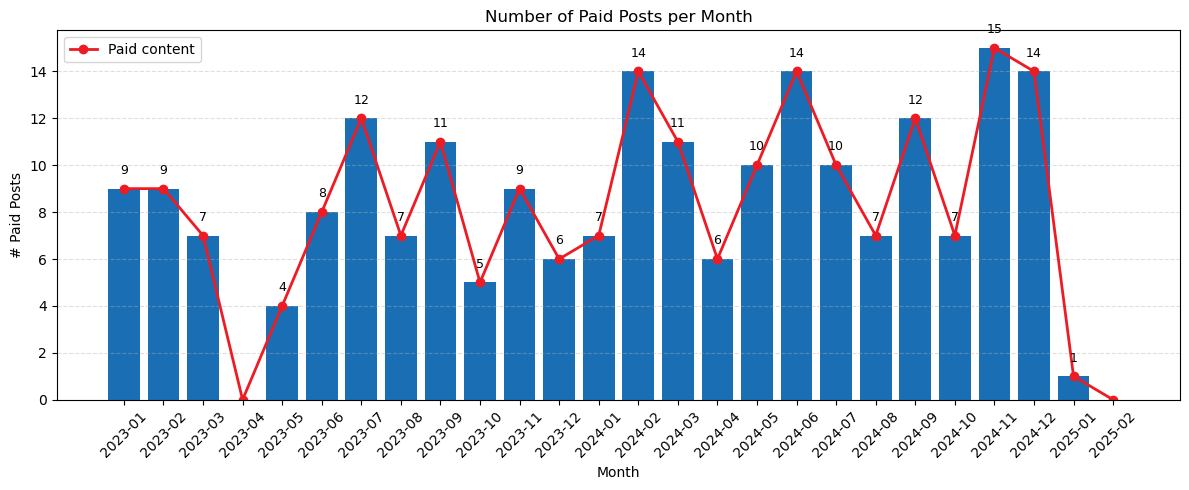

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Colori Aprilia
aprilia_blue = '#0072CE'   # blu racing
aprilia_red = '#ED1C24'    # rosso corsa

# Assicurati che la colonna 'Date' sia datetime
Start_df['Date'] = pd.to_datetime(Start_df['Date'])

# Estrai YearMonth
Start_df['YearMonth'] = Start_df['Date'].dt.to_period('M').astype(str)

# Raggruppa: numero di contenuti paid per mese
monthly_paid_counts = Start_df.groupby('YearMonth')['Has paid'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 5))

# Barre blu
bars = sns.barplot(data=monthly_paid_counts, x='YearMonth', y='Has paid', color=aprilia_blue)

# Linea rossa che collega i punti reali
plt.plot(monthly_paid_counts['Has paid'].values, color=aprilia_red, marker='o', linewidth=2, label='Paid content')

# Etichette sopra le barre
for i, row in monthly_paid_counts.iterrows():
    if row['Has paid'] > 0:
        plt.text(i, row['Has paid'] + 0.5, int(row['Has paid']),
                 ha='center', va='bottom', fontsize=9)

# Estetica
plt.title('Number of Paid Posts per Month')
plt.ylabel('# Paid Posts')
plt.xlabel('Month')
plt.xticks(rotation=45, ticks=range(len(monthly_paid_counts)), labels=monthly_paid_counts['YearMonth'])
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd

# Mappatura da codice numerico a etichetta testuale del Media
media_map = {
    0: 'Carousel',
    1: 'Link',
    2: 'Photo',
    3: 'Reel',
    4: 'Status',
    5: 'Video'
}

# Conta Paid e Organic per ciascun tipo di media
media_paid = Start_df[Start_df['Has paid'] == 1]['Media'].value_counts().sort_index()
media_organic = Start_df[Start_df['Has paid'] == 0]['Media'].value_counts().sort_index()

# Costruisci tabella con i valori assoluti
media_df = pd.DataFrame({
    'Paid': media_paid,
    'Organic': media_organic
}).fillna(0).astype(int)

media_df['Total'] = media_df['Paid'] + media_df['Organic']
media_df['Media'] = media_df.index.map(media_map)

# Riorganizza e mostra
media_df = media_df[['Media', 'Paid', 'Organic', 'Total']].reset_index(drop=True)
display(media_df)


,Media,Paid,Organic,Total
0,Carousel,0,1,1
1,Link,0,4,4
2,Photo,111,592,703
3,Reel,4,8,12
4,Status,0,9,9
5,Video,100,321,421


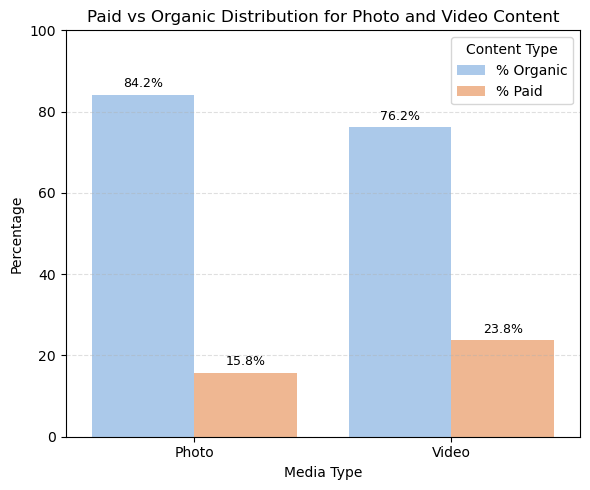

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = Start_df[Start_df['Media'].isin([2, 5])]

media_grouped = filtered_df.groupby(['Media', 'Has paid']).size().unstack(fill_value=0)

media_grouped['Total'] = media_grouped[0] + media_grouped[1]
media_grouped['% Organic'] = (media_grouped[0] / media_grouped['Total'] * 100).round(1)
media_grouped['% Paid'] = (media_grouped[1] / media_grouped['Total'] * 100).round(1)

media_plot = media_grouped[['% Organic', '% Paid']].reset_index()
media_plot['Media'] = media_plot['Media'].map({2: 'Photo', 5: 'Video'})
media_plot = pd.melt(media_plot, id_vars='Media', var_name='Type', value_name='Percentage')

plt.figure(figsize=(6, 5))
ax = sns.barplot(data=media_plot, x='Media', y='Percentage', hue='Type', palette='pastel')

for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%',
                ha='center', va='bottom', fontsize=9)

plt.title('Paid vs Organic Distribution for Photo and Video Content')
plt.ylabel('Percentage')
plt.xlabel('Media Type')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd

def count_paid_vs_organic(df, column):
    counts = df.groupby([column, 'Has paid']).size().unstack(fill_value=0)
    counts.columns = ['Organic', 'Paid']
    return counts

acc_counts = count_paid_vs_organic(Start_df, 'Acc yes/no')
event_counts = count_paid_vs_organic(Start_df, 'Event yes/no')
racing_counts = count_paid_vs_organic(Start_df, 'Racing yes/no')

display(acc_counts)
display(event_counts)
display(racing_counts)


,Organic,Paid
Acc yes/no,,
0,920,199
1,15,16


,Organic,Paid
Event yes/no,,
0,829,172
1,106,43


,Organic,Paid
Racing yes/no,,
0,328,186
1,607,29


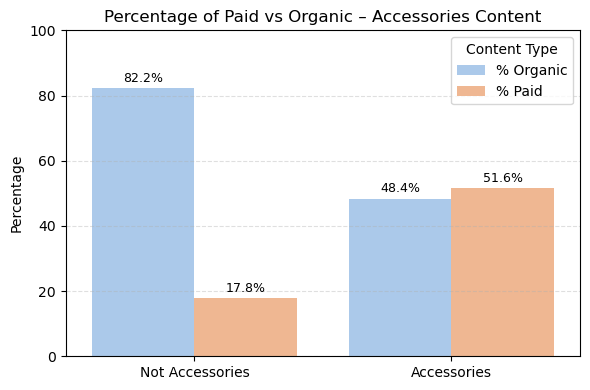

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcolo dei valori per 'Acc yes/no'
acc_counts = Start_df.groupby(['Acc yes/no', 'Has paid']).size().unstack(fill_value=0)
acc_counts.columns = ['Organic', 'Paid']
acc_counts['Total'] = acc_counts['Organic'] + acc_counts['Paid']
acc_counts['% Organic'] = (acc_counts['Organic'] / acc_counts['Total'] * 100).round(1)
acc_counts['% Paid'] = (acc_counts['Paid'] / acc_counts['Total'] * 100).round(1)

# Riorganizza per grafico
acc_plot = acc_counts[['% Organic', '% Paid']].reset_index()
acc_plot['Acc yes/no'] = acc_plot['Acc yes/no'].map({0: 'Not Accessories', 1: 'Accessories'})
acc_plot = pd.melt(acc_plot, id_vars='Acc yes/no', var_name='Type', value_name='Percentage')

# Plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=acc_plot, x='Acc yes/no', y='Percentage', hue='Type', palette='pastel')

# Etichette sopra le barre
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# Personalizzazione
plt.title('Percentage of Paid vs Organic – Accessories Content')
plt.ylabel('Percentage')
plt.xlabel('')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()


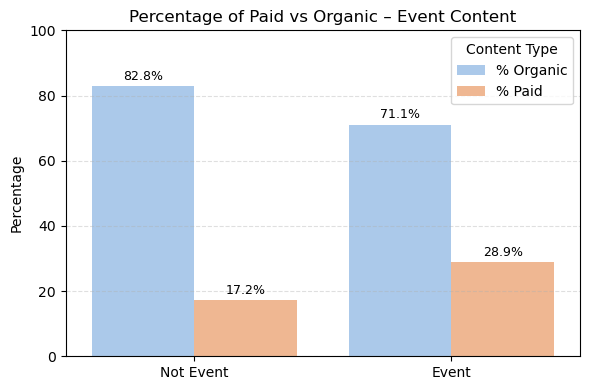

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcolo dei valori per 'Event yes/no'
event_counts = Start_df.groupby(['Event yes/no', 'Has paid']).size().unstack(fill_value=0)
event_counts.columns = ['Organic', 'Paid']
event_counts['Total'] = event_counts['Organic'] + event_counts['Paid']
event_counts['% Organic'] = (event_counts['Organic'] / event_counts['Total'] * 100).round(1)
event_counts['% Paid'] = (event_counts['Paid'] / event_counts['Total'] * 100).round(1)

# Riorganizza per grafico
event_plot = event_counts[['% Organic', '% Paid']].reset_index()
event_plot['Event yes/no'] = event_plot['Event yes/no'].map({0: 'Not Event', 1: 'Event'})
event_plot = pd.melt(event_plot, id_vars='Event yes/no', var_name='Type', value_name='Percentage')

# Plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=event_plot, x='Event yes/no', y='Percentage', hue='Type', palette='pastel')

# Etichette sopra le barre
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# Personalizzazione
plt.title('Percentage of Paid vs Organic – Event Content')
plt.ylabel('Percentage')
plt.xlabel('')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()


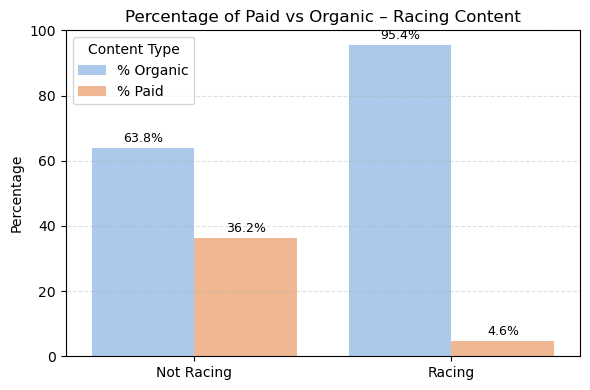

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcolo dei valori per 'Racing yes/no'
racing_counts = Start_df.groupby(['Racing yes/no', 'Has paid']).size().unstack(fill_value=0)
racing_counts.columns = ['Organic', 'Paid']
racing_counts['Total'] = racing_counts['Organic'] + racing_counts['Paid']
racing_counts['% Organic'] = (racing_counts['Organic'] / racing_counts['Total'] * 100).round(1)
racing_counts['% Paid'] = (racing_counts['Paid'] / racing_counts['Total'] * 100).round(1)

# Riorganizza per grafico
racing_plot = racing_counts[['% Organic', '% Paid']].reset_index()
racing_plot['Racing yes/no'] = racing_plot['Racing yes/no'].map({0: 'Not Racing', 1: 'Racing'})
racing_plot = pd.melt(racing_plot, id_vars='Racing yes/no', var_name='Type', value_name='Percentage')

# Plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=racing_plot, x='Racing yes/no', y='Percentage', hue='Type', palette='pastel')

# Etichette sopra le barre
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# Personalizzazione
plt.title('Percentage of Paid vs Organic – Racing Content')
plt.ylabel('Percentage')
plt.xlabel('')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()


C:\Users\matte\AppData\Local\Temp\ipykernel_2396\1393172157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Start_df['Time'] = pd.to_datetime(Start_df['Time'], format='%H:%M:%S', errors='coerce').dt.time
C:\Users\matte\AppData\Local\Temp\ipykernel_2396\1393172157.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Start_df['Minutes'] = Start_df['Time'].apply(lambda t: t.hour * 60 + t.minute)
C:\Users\matte\AppData\Local\Temp\ipykernel_2396\1393172157.py:11: SettingWithCopyWarning: 
A value is trying to 

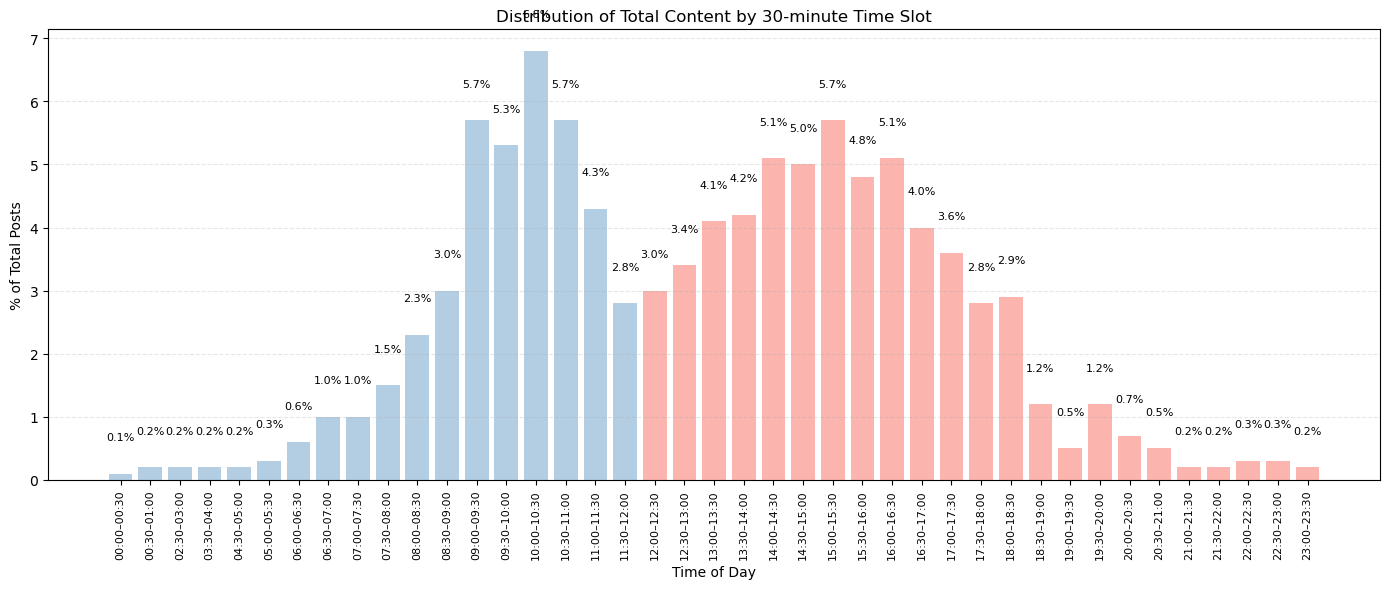

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assicurati che 'Time' sia in formato datetime.time
Start_df['Time'] = pd.to_datetime(Start_df['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Calcolo minuti dal giorno
Start_df['Minutes'] = Start_df['Time'].apply(lambda t: t.hour * 60 + t.minute)

# Crea bin da 30 minuti
Start_df['Time Bin'] = (Start_df['Minutes'] // 30) * 30

# Etichetta leggibile
def format_bin_label(minute):
    h1, m1 = divmod(minute, 60)
    h2, m2 = divmod(minute + 30, 60)
    return f"{h1:02d}:{m1:02d}–{h2:02d}:{m2:02d}"

Start_df['Time Bin Label'] = Start_df['Time Bin'].apply(format_bin_label)

# Conta totale contenuti per fascia
bin_total_counts = Start_df['Time Bin Label'].value_counts(normalize=True).sort_index() * 100
bin_total_counts = bin_total_counts.round(1).reset_index()
bin_total_counts.columns = ['Time Bin', 'Percentage']

# Colora AM vs PM
bin_total_counts['Hour'] = bin_total_counts['Time Bin'].str[:2].astype(int)
bin_total_counts['AM/PM'] = bin_total_counts['Hour'].apply(lambda h: 'AM' if h < 12 else 'PM')
colors = bin_total_counts['AM/PM'].map({'AM': '#B3CDE3', 'PM': '#FBB4AE'})

# Plot
plt.figure(figsize=(14, 6))
bars = plt.bar(bin_total_counts['Time Bin'], bin_total_counts['Percentage'], color=colors)

# Etichette sopra le barre
for i, val in enumerate(bin_total_counts['Percentage']):
    if val > 0:
        plt.text(i, val + 0.5, f'{val}%', ha='center', va='bottom', fontsize=8)

# Personalizzazione grafico
plt.title('Distribution of Total Content by 30-minute Time Slot')
plt.ylabel('% of Total Posts')
plt.xlabel('Time of Day')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\matte\AppData\Local\Temp\ipykernel_2396\1898451800.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Start_df['Time'] = pd.to_datetime(Start_df['Time'], format='%H:%M:%S', errors='coerce').dt.time
C:\Users\matte\AppData\Local\Temp\ipykernel_2396\1898451800.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Start_df['Minutes'] = Start_df['Time'].apply(lambda t: t.hour * 60 + t.minute)
C:\Users\matte\AppData\Local\Temp\ipykernel_2396\1898451800.py:11: SettingWithCopyWarning: 
A value is trying to 

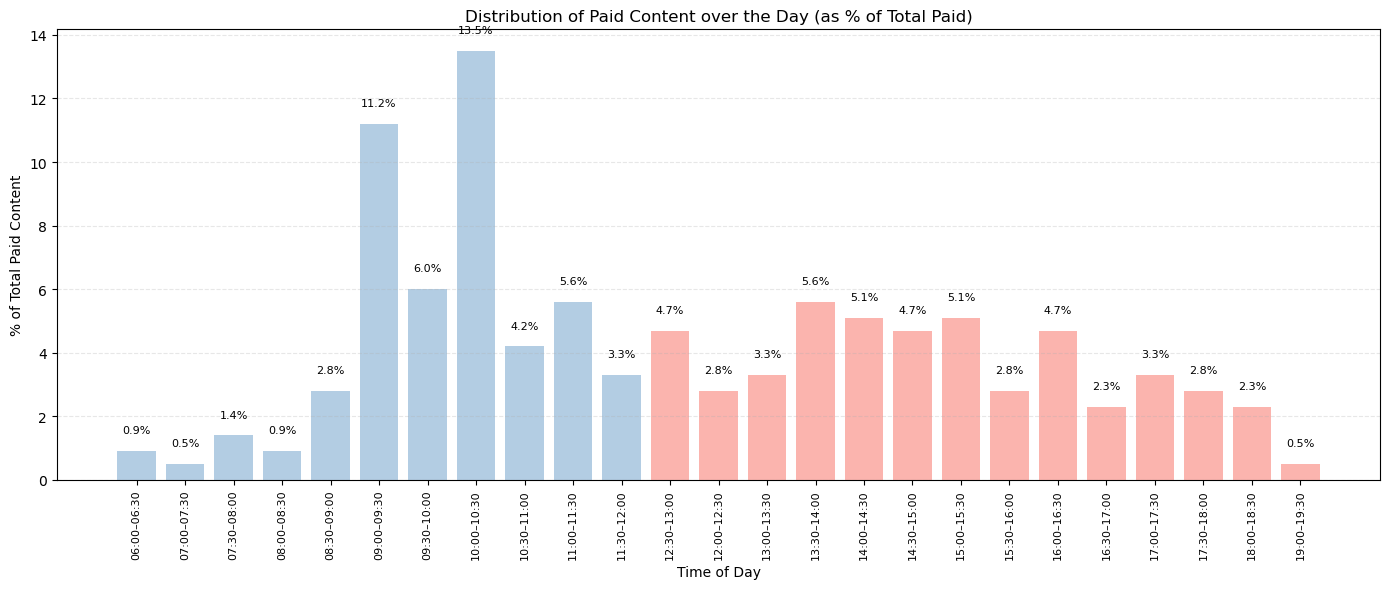

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assicurati che la colonna Time sia datetime.time
Start_df['Time'] = pd.to_datetime(Start_df['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Calcolo minuti dal giorno
Start_df['Minutes'] = Start_df['Time'].apply(lambda t: t.hour * 60 + t.minute)

# Fasce da 30 minuti
Start_df['Time Bin'] = (Start_df['Minutes'] // 30) * 30

# Etichette leggibili
def format_bin_label(minute):
    h1, m1 = divmod(minute, 60)
    h2, m2 = divmod(minute + 30, 60)
    return f"{h1:02d}:{m1:02d}–{h2:02d}:{m2:02d}"
Start_df['Time Bin Label'] = Start_df['Time Bin'].apply(format_bin_label)

# Filtra solo Paid
paid_df = Start_df[Start_df['Has paid'] == 1]

# Conta Paid per fascia
paid_counts = paid_df['Time Bin Label'].value_counts().sort_index()

# Calcola % Paid per fascia sul totale Paid
paid_percent = (paid_counts / paid_counts.sum() * 100).round(1).reset_index()
paid_percent.columns = ['Time Bin', '% of Total Paid']

# Aggiungi AM/PM e ordina
paid_percent['Hour'] = paid_percent['Time Bin'].str[:2].astype(int)
paid_percent['AM/PM'] = paid_percent['Hour'].apply(lambda h: 'AM' if h < 12 else 'PM')
paid_percent = paid_percent.sort_values(by='Hour')
colors = paid_percent['AM/PM'].map({'AM': '#B3CDE3', 'PM': '#FBB4AE'})

# Plot
plt.figure(figsize=(14, 6))
bars = plt.bar(paid_percent['Time Bin'], paid_percent['% of Total Paid'], color=colors)

# Etichette
for i, val in enumerate(paid_percent['% of Total Paid']):
    if val > 0:
        plt.text(i, val + 0.5, f'{val}%', ha='center', va='bottom', fontsize=8)

# Stile
plt.title('Distribution of Paid Content over the Day (as % of Total Paid)')
plt.ylabel('% of Total Paid Content')
plt.xlabel('Time of Day')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [25]:
columns_to_drop = ['YearMonth', 'Month', 'Minutes', 'Time Bin', 'Time Bin Label', 'AM/PM']

Start_df = Start_df.drop(columns=[col for col in columns_to_drop if col in Start_df.columns])


In [26]:
base_columns = ['Date', 'Time','Has paid','Media', 'Acc yes/no', 'Event yes/no', 'Racing yes/no','Product group']

r_i_columns = ['Total reach', 'Total impressions']

engagement_columns = ['Total interactions', 'Total reactions', 'Total comments', 'Total shares', 'Engagements','Impressions engagement rate',
                      'Reach engagement rate', 'Total story comments', 'Total story shares']

click_columns = ['Post clicks', 'Photo views', 'Link clicks', 'Other clicks']

video_columns = ['Video length (sec)', 'Video view count', 'Total video view time (sec)', 'Completed video views', 'Average completion (%)',
                 'Average time watched (sec)', 'Views - paid', 'Views - organic', 'Views - unique']

r_i_df = Start_df[base_columns + r_i_columns]
engagement_df = Start_df[base_columns + engagement_columns]
click_df = MainData_adj[base_columns + click_columns]
video_df = Start_df[base_columns + video_columns]

# 📊 **Impressions & Reach: Specific Eda** 📉📈

### 📊 Focus on Impressions and Reach

In this section, the focus shifts to **Impressions** and **Reach**, two critical metrics for understanding the impact of online content. Given that the regressions we'll develop later will use variables like **media type**, **event presence**, **racing content**, **product type**, and **accessories** as covariates, the first step was to **log-scale** these metrics. 

This was necessary because the raw values contained extreme outliers, making standard scale plots hard to interpret and prone to being skewed by high-value data points. 📏

#### Key Observations

- **Log-Scaled Consistency:** When plotting the **log-scaled** values of **Total Reach** and **Total Impressions**, a similar distribution emerges, suggesting that these two metrics likely follow similar patterns in the upcoming regressions. This also hints at their potential **interchangeability** when drawing analytical conclusions. 🔄

- **Covariate Box Plots:** To explore this further, box plots were generated for each covariate, distinguishing between **paid** and **organic** content. For example, when breaking down by **product type**, the analysis included:  
    - **Entry Level - Paid** vs. **Entry Level - Organic**  
    - **Top/Core - Paid** vs. **Top/Core - Organic**  
    - **Scooters - Paid** vs. **Scooters - Organic**  
    - **Non-Product - Paid** vs. **Non-Product - Organic**  

- **Consistent Boost from Paid Content:** Across all covariates, the trend is clear: **paid** content consistently outperforms **organic**, reflecting the direct impact of boosting on reach and visibility. 🚀

These initial visualizations lay the groundwork for the more detailed regression analysis to come, providing a clearer picture of the role each variable plays in driving engagement. 📊


C:\Users\matte\AppData\Local\Temp\ipykernel_2396\1781322443.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  r_i_log = r_i_df[['Total reach', 'Total impressions']].applymap(lambda x: np.log10(x + 1))


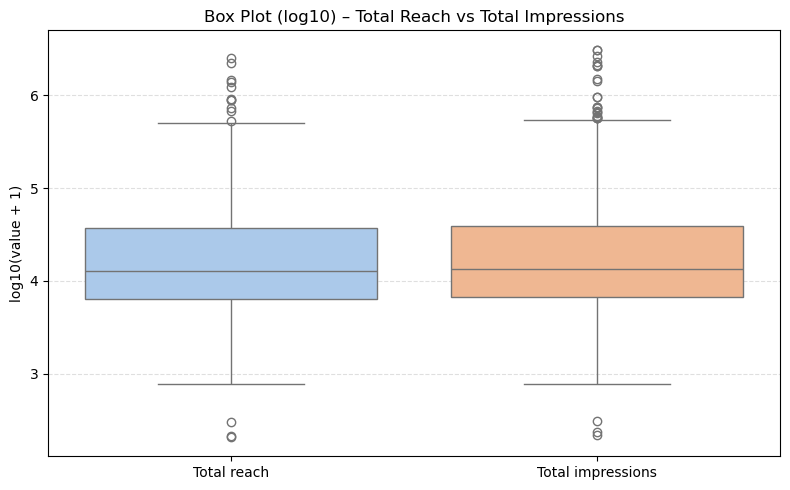

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Applica log10 (aggiungiamo +1 per evitare log(0))
r_i_log = r_i_df[['Total reach', 'Total impressions']].applymap(lambda x: np.log10(x + 1))

# Plot con boxplot su scala log
plt.figure(figsize=(8, 5))
sns.boxplot(data=r_i_log, palette='pastel')
plt.title('Box Plot (log10) – Total Reach vs Total Impressions')
plt.ylabel('log10(value + 1)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


C:\Users\matte\AppData\Local\Temp\ipykernel_2396\1823236170.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=media_subset, x='Group', y='log_reach', palette='pastel')


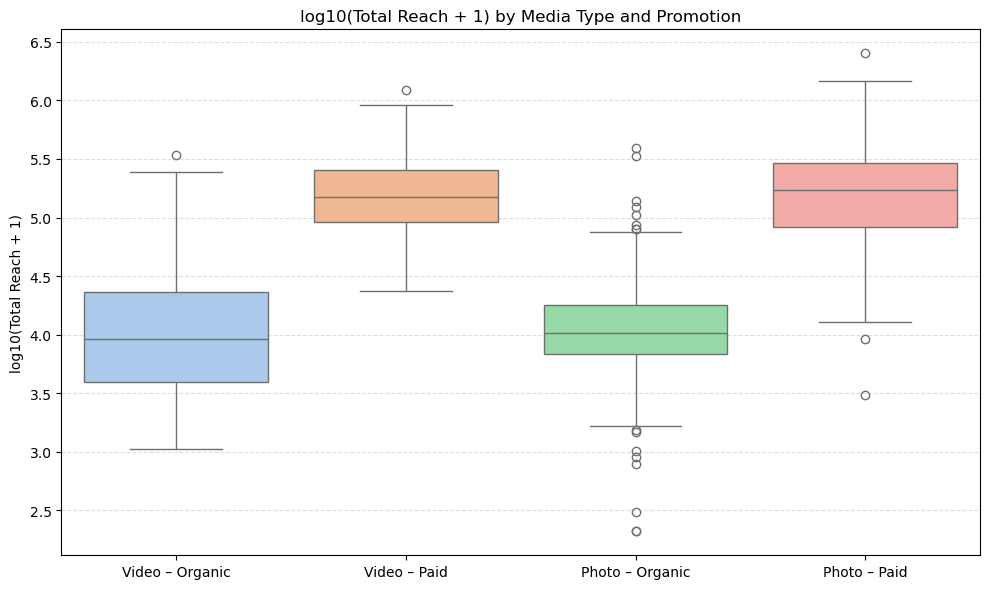

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filtro solo Photo (2) e Video (5)
media_subset = r_i_df[r_i_df['Media'].isin([2, 5])].copy()

# Mappa media e paid
media_map = {2: 'Photo', 5: 'Video'}
paid_map = {0: 'Organic', 1: 'Paid'}

media_subset['Media Label'] = media_subset['Media'].map(media_map)
media_subset['Paid Label'] = media_subset['Has paid'].map(paid_map)

# Crea colonna combinata per etichette
media_subset['Group'] = media_subset['Media Label'] + ' – ' + media_subset['Paid Label']

# Filtro: Total reach > 0 e log-transform
media_subset = media_subset[media_subset['Total reach'] > 0].copy()
media_subset['log_reach'] = np.log10(media_subset['Total reach'] + 1)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=media_subset, x='Group', y='log_reach', palette='pastel')

# Personalizzazione
plt.title('log10(Total Reach + 1) by Media Type and Promotion')
plt.ylabel('log10(Total Reach + 1)')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


C:\Users\matte\AppData\Local\Temp\ipykernel_2396\2295421696.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=event_subset, x='Group', y='log_reach', palette='pastel')


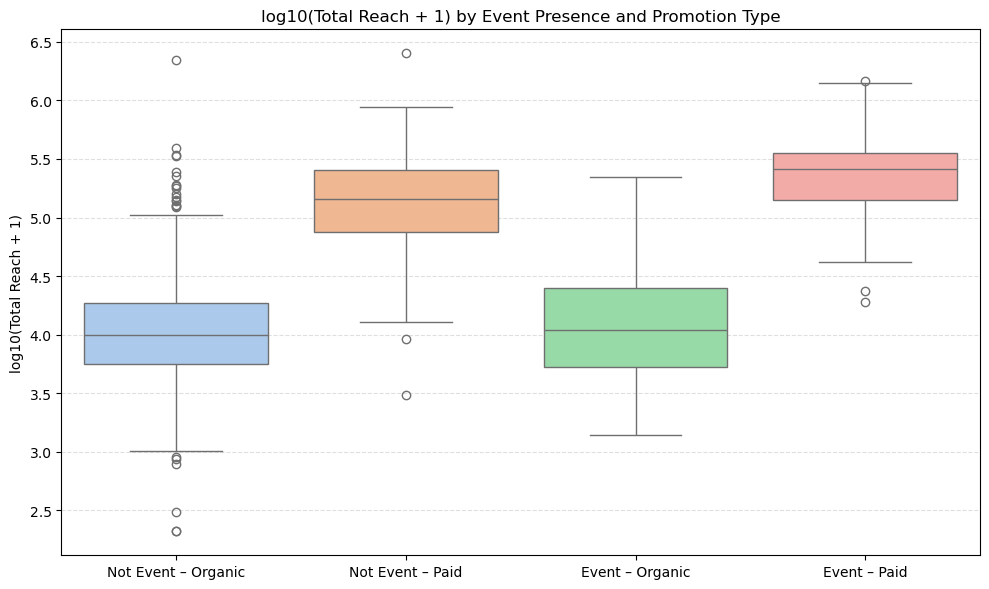

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Copia solo le colonne rilevanti
event_subset = r_i_df[['Total reach', 'Event yes/no', 'Has paid']].copy()

# Mappa le etichette
event_map = {0: 'Not Event', 1: 'Event'}
paid_map = {0: 'Organic', 1: 'Paid'}

event_subset['Event Label'] = event_subset['Event yes/no'].map(event_map)
event_subset['Paid Label'] = event_subset['Has paid'].map(paid_map)

# Colonna combinata per le 4 categorie
event_subset['Group'] = event_subset['Event Label'] + ' – ' + event_subset['Paid Label']

# Filtro: solo valori > 0 e log-transform
event_subset = event_subset[event_subset['Total reach'] > 0].copy()
event_subset['log_reach'] = np.log10(event_subset['Total reach'] + 1)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=event_subset, x='Group', y='log_reach', palette='pastel')

# Stile grafico
plt.title('log10(Total Reach + 1) by Event Presence and Promotion Type')
plt.ylabel('log10(Total Reach + 1)')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


C:\Users\matte\AppData\Local\Temp\ipykernel_2396\523257899.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=racing_subset, x='Group', y='log_reach', palette='pastel')


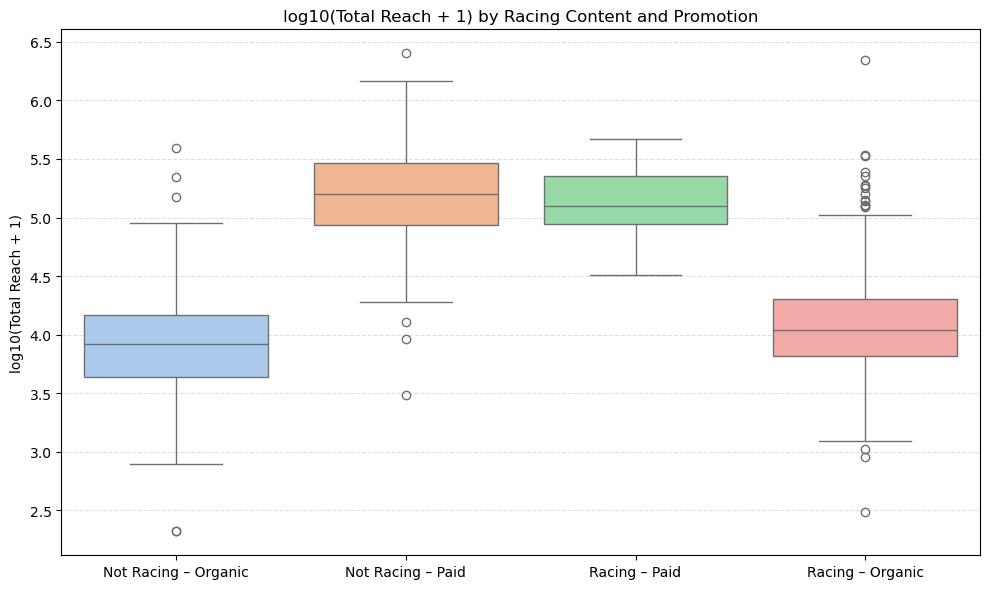

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filtro righe valide
racing_subset = r_i_df[r_i_df['Total reach'] > 0].copy()

# Etichette leggibili
racing_map = {0: 'Not Racing', 1: 'Racing'}
paid_map = {0: 'Organic', 1: 'Paid'}

racing_subset['Racing Label'] = racing_subset['Racing yes/no'].map(racing_map)
racing_subset['Paid Label'] = racing_subset['Has paid'].map(paid_map)
racing_subset['Group'] = racing_subset['Racing Label'] + ' – ' + racing_subset['Paid Label']

# Statistiche descrittive
racing_stats = racing_subset.groupby('Group')['Total reach'].describe().round(2)

# Calcola log10 + 1 per evitare log(0)
racing_subset['log_reach'] = np.log10(racing_subset['Total reach'] + 1)

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=racing_subset, x='Group', y='log_reach', palette='pastel')

# Stile grafico
plt.title('log10(Total Reach + 1) by Racing Content and Promotion')
plt.ylabel('log10(Total Reach + 1)')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


C:\Users\matte\AppData\Local\Temp\ipykernel_2396\3803385131.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=product_subset, x='Group', y='log_reach', palette='pastel')


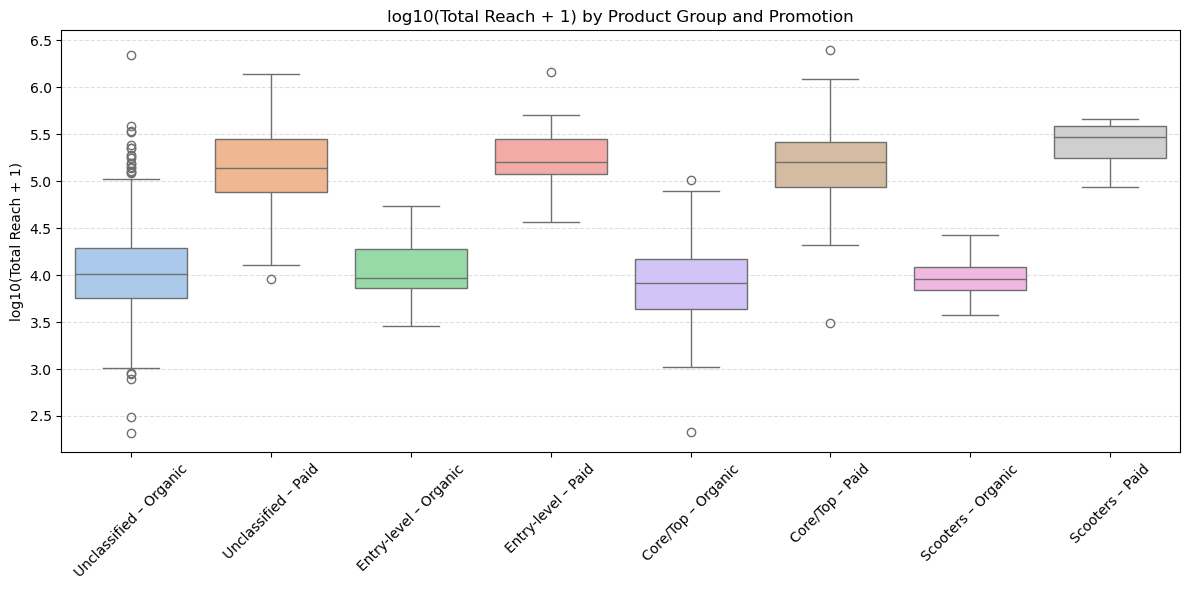

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filtro righe valide
product_subset = r_i_df[r_i_df['Total reach'] > 0].copy()

# Etichette leggibili
product_map = {
    0: 'Unclassified',
    1: 'Entry-level',
    2: 'Core/Top',
    3: 'Scooters'
}
paid_map = {0: 'Organic', 1: 'Paid'}

# Etichette combinate
product_subset['Product Label'] = product_subset['Product group'].map(product_map)
product_subset['Paid Label'] = product_subset['Has paid'].map(paid_map)
product_subset['Group'] = product_subset['Product Label'] + ' – ' + product_subset['Paid Label']

# Ordine personalizzato
ordered_groups = [
    'Unclassified – Organic', 'Unclassified – Paid',
    'Entry-level – Organic', 'Entry-level – Paid',
    'Core/Top – Organic', 'Core/Top – Paid',
    'Scooters – Organic', 'Scooters – Paid'
]
product_subset['Group'] = pd.Categorical(product_subset['Group'], categories=ordered_groups, ordered=True)

# Log-transform
product_subset['log_reach'] = np.log10(product_subset['Total reach'] + 1)

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=product_subset, x='Group', y='log_reach', palette='pastel')

# Stile grafico
plt.title('log10(Total Reach + 1) by Product Group and Promotion')
plt.ylabel('log10(Total Reach + 1)')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\matte\AppData\Local\Temp\ipykernel_2396\14376817.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=acc_subset, x='Group', y='log_reach', palette='pastel')


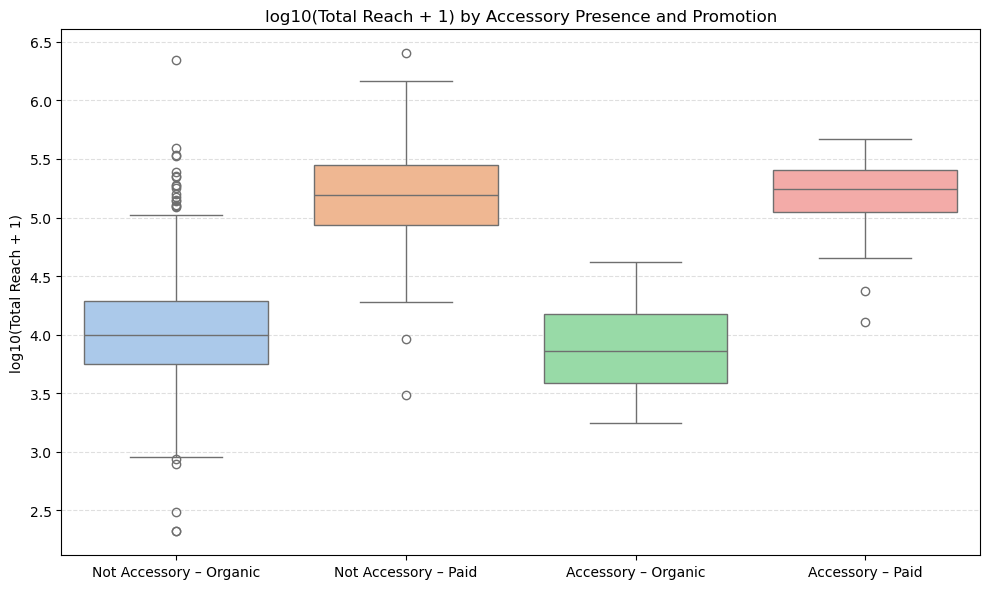

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Filtro righe valide
acc_subset = r_i_df[r_i_df['Total reach'] > 0].copy()

#Mappa etichette
acc_map = {0: 'Not Accessory', 1: 'Accessory'} 
paid_map = {0: 'Organic', 1: 'Paid'}

acc_subset['Accessory Label'] = acc_subset['Acc yes/no'].map(acc_map) 
acc_subset['Paid Label'] = acc_subset['Has paid'].map(paid_map) 
acc_subset['Group'] = acc_subset['Accessory Label'] + ' – ' + acc_subset['Paid Label']

#Statistiche descrittive
acc_stats = acc_subset.groupby('Group')['Total reach'].describe().round(2)

# Ordine manuale per chiarezza
ordered_groups = [
    'Not Accessory – Organic', 'Not Accessory – Paid',
    'Accessory – Organic', 'Accessory – Paid'
]

# Aggiungi categoria ordinata
acc_subset['Group'] = pd.Categorical(acc_subset['Group'], categories=ordered_groups, ordered=True)

# Log-transform del reach
acc_subset['log_reach'] = np.log10(acc_subset['Total reach'] + 1)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=acc_subset, x='Group', y='log_reach', palette='pastel')

# Stile grafico
plt.title('log10(Total Reach + 1) by Accessory Presence and Promotion')
plt.ylabel('log10(Total Reach + 1)')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# 💡 **Clarification Corner**
- It is also noted that the **paid vs. organic** ratio is consistently higher for all other dependent variables considered in this notebook. To avoid redundant repetition, we have opted not to include this type of EDA for each variable.  
- **Note**: The only exception to this trend is the **engagement-to-reach ratio**, which will be addressed in a separate comment.


# 📊 **Impressions & Reach: Causal Effects** 📉📈

### 💥 **Paid Boost Power: Testing the Causal Impact on Reach**  

***  
The first regression was run with **log_reach** as the dependent variable and **paid** (converted to a dummy variable) as the explanatory variable. The goal here was to isolate the power of **has_paid** and assess the initial **R-squared** levels.  

As expected, **paid** provides a significant boost to **log_reach** (**+2.6578 * Has_paid**) with an adjusted **R-squared** of approximately **0.53** and strong model significance.  

Adding other covariates individually did not significantly improve **R-squared**. However, in the full model containing all covariates (without interactions), the **R-squared** value surpassed **0.55**. In this case, the **paid** variable remained both strong and significant, further supporting the impact of this action on **log_reach**.  

The same model was also run using **log_impressions** as the dependent variable, yielding similarly positive results for **paid**, confirming its substantial impact on both reach and impressions. 🚀📊  

When interactions were included, the model showed no significant improvements, so to maintain interpretability, this interaction-heavy model was not selected as the final one.  
***



In [33]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Rinominazione per sicurezza
df = r_i_df.rename(columns={
    'Has paid': 'Has_paid',
    'Acc yes/no': 'Acc_yes_no',
    'Event yes/no': 'Event_yes_no',
    'Racing yes/no': 'Racing_yes_no',
    'Product group': 'Product_group'
}).dropna()

# Log-transform del target
df = df[df['Total reach'] > 0].copy()
df['log_reach'] = np.log(df['Total reach'] + 1)

# Variabili categoriche
categorical_vars = ['Media', 'Acc_yes_no', 'Event_yes_no', 'Racing_yes_no', 'Product_group']
base = 'C(Has_paid)'

# --- 1. Modello base ---
formula_base = f'log_reach ~ {base}'
model_base = smf.ols(formula=formula_base, data=df).fit(cov_type='HC1')
print("\n📌 MODELLO BASE (log-scaled) – robust standard errors:\n")
print(model_base.summary())

# --- 2. Modelli uno-a-uno ---
for var in categorical_vars:
    formula = f'log_reach ~ {base} + C({var})'
    model = smf.ols(formula=formula, data=df).fit(cov_type='HC1')
    print(f"\n📌 MODELLO CON {var} (log-scaled) – robust standard errors:\n")
    print(model.summary())

# --- 3. Modello completo con tutte le variabili ---
full_terms = ' + '.join([f'C({v})' for v in categorical_vars])
formula_full = f'log_reach ~ {base} + {full_terms}'
model_full = smf.ols(formula=formula_full, data=df).fit(cov_type='HC1')
print("\n📌 MODELLO COMPLETO (log-scaled) – robust standard errors:\n")
print(model_full.summary())

# --- 4. Modello con interazioni ---
interaction_terms = ' + '.join([f'C({v})*{base}' for v in categorical_vars])
formula_interact = f'log_reach ~ {interaction_terms}'
model_interact = smf.ols(formula=formula_interact, data=df).fit(cov_type='HC1')
print("\n📌 MODELLO CON INTERAZIONI (log-scaled) – robust standard errors:\n")
print(model_interact.summary())



📌 MODELLO BASE (log-scaled) – robust standard errors:

                            OLS Regression Results                            
Dep. Variable:              log_reach   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     1414.
Date:                Sat, 10 May 2025   Prob (F-statistic):          2.67e-202
Time:                        23:24:31   Log-Likelihood:                -1606.2
No. Observations:                1150   AIC:                             3216.
Df Residuals:                    1148   BIC:                             3226.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

C:\Users\matte\anaconda3\envs\Marketing\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 23, but rank is 20
  warnings.warn('covariance of constraints does not have full '


### 🔄 **Momentum or Myth? Testing the Impact of Lagged Values on Reach and Impressions**  

***  
A second part of the **reach** and **impressions** analysis involved adding **lagged values** of these metrics to the model. This approach was based on the idea that there might be a **momentum effect** in social media performance – if a previous post performed well in terms of reach and impressions, the momentum might carry over, positively impacting the performance of the next post as well. 📈⚡  

(It's a bit like a social media "echo" effect, where successful posts can create a ripple, enhancing the visibility of subsequent content. 🌊📢)

However, this hypothesis didn't lead to significant **R-squared** improvements, suggesting that this momentum effect might be less impactful than expected, at least in this context. Given the similar performance but higher simplicity of the first model, we opted to stick with the original approach. ✅  
***


In [34]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Ordina per tempo
df = r_i_df.sort_values(by=['Date', 'Time']).copy()

# Calcola log reach e lag di log reach
df['log_reach'] = np.log(df['Total reach'] + 1)
df['log_reach_lag1'] = df['log_reach'].shift(1)

# Rinomina colonne per compatibilità formula
df = df.rename(columns={
    'Has paid': 'Has_paid',
    'Acc yes/no': 'Acc_yes_no',
    'Event yes/no': 'Event_yes_no',
    'Racing yes/no': 'Racing_yes_no',
    'Product group': 'Product_group'
})

# Rimuovi righe con NaN dopo shift
df = df.dropna()

# Formula: lag + categorical + date components
formula = (
    'log_reach ~ log_reach_lag1 + C(Has_paid) + C(Media) + C(Acc_yes_no) + '
    'C(Event_yes_no) + C(Racing_yes_no) + C(Product_group) '
)

# Fit modello con robust SE
model = smf.ols(formula=formula, data=df).fit(cov_type='HC1')

# Output
print("\n📌 MODELLO CON LAG + COVARIATE (log Total Reach):\n")
print(model.summary())



📌 MODELLO CON LAG + COVARIATE (log Total Reach):

                            OLS Regression Results                            
Dep. Variable:              log_reach   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     567.2
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        23:24:32   Log-Likelihood:                -1564.5
No. Observations:                1149   AIC:                             3157.
Df Residuals:                    1135   BIC:                             3228.
Df Model:                          13                                         
Covariance Type:                  HC1                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

In [35]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Ordina per tempo
df = r_i_df.sort_values(by=['Date', 'Time']).copy()

# Log-transform e calcolo del lag
df['log_impressions'] = np.log(df['Total impressions'] + 1)
df['log_impressions_lag1'] = df['log_impressions'].shift(1)

# Rinomina colonne per compatibilità formula
df = df.rename(columns={
    'Has paid': 'Has_paid',
    'Acc yes/no': 'Acc_yes_no',
    'Event yes/no': 'Event_yes_no',
    'Racing yes/no': 'Racing_yes_no',
    'Product group': 'Product_group'
})

# Rimuove righe con valori mancanti (lag o altri)
df = df.dropna()

# Formula con lag e covariate categoriche
formula = (
    'log_impressions ~ log_impressions_lag1 + C(Has_paid) + C(Media) + '
    'C(Acc_yes_no) + C(Event_yes_no) + C(Racing_yes_no) + C(Product_group)'
)

# Fit del modello con robust SE
model = smf.ols(formula=formula, data=df).fit(cov_type='HC1')

# Output
print("\n📌 MODELLO CON LAG + COVARIATE (log Total Impressions):\n")
print(model.summary())



📌 MODELLO CON LAG + COVARIATE (log Total Impressions):

                            OLS Regression Results                            
Dep. Variable:        log_impressions   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     598.2
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        23:24:32   Log-Likelihood:                -1561.8
No. Observations:                1149   AIC:                             3152.
Df Residuals:                    1135   BIC:                             3222.
Df Model:                          13                                         
Covariance Type:                  HC1                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

### 🕰️ **Timing is Not Important (at least with the simple clusters we tried)**  

***  
In a final attempt to improve the model, **time** was included as an additional variable. This time, the hours each post was published were grouped into broader, pre-defined **time clusters** – **Morning + Early Afternoon** (7-14), **Late Afternoon + Evening** (14-21), and **Night** (21-7) – rather than relying on potentially data-leaking methods like the **elbow method**.  

However, this more robust approach did not lead to any significant improvements in **R-squared**, suggesting that timing, when treated this way, may have a less critical role in determining overall impressions than initially anticipated. 📉🤔  
***

# 😀🔥 **Engagement: Specific EDA** 💬📊


### 🔗 **Correlation Highlights**  

For the **engagement** specific EDA, a strong correlation was observed between several variables, such as **Total Interactions** and **Total Reactions**, as well as **Impressions Engagement Rate** and **Reach Engagement Rate**. Similarly, **Total Story Comments** and **Total Story Shares** overlapped significantly with **Total Comments** and **Total Shares**, respectively.  

To streamline the analysis and reduce redundancy, these overlapping variables were **dropped** from the final dataframe.  

Additionally, **time clustering** was performed with the following categories: **morning** (8-12), **afternoon** (12-16), **evening** (16-21), and **night** (21-8). However, we anticipate that this variable will have a relatively **minor impact** on the overall model performance. 🌅☀️🌇🌙  


In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure Date and Time are in the correct format
engagement_df['Date'] = pd.to_datetime(engagement_df['Date'], errors='coerce')
engagement_df['Time'] = pd.to_datetime(engagement_df['Time'], format='%H:%M:%S', errors='coerce')
engagement_df['Month'] = engagement_df['Date'].dt.month
engagement_df['Weekday'] = engagement_df['Date'].dt.dayofweek  # 0 = Monday
engagement_df['Days_since_start'] = (engagement_df['Date'] - engagement_df['Date'].min()).dt.days

# Calculate the hour in decimal format if not already present
engagement_df['Hour'] = engagement_df['Time'].dt.hour + engagement_df['Time'].dt.minute / 60

# Define more specific time clusters
def assign_time_cluster(hour):
    if 8 <= hour < 12:
        return 0  # Morning
    elif 12 <= hour < 16:
        return 1  # Afternoon
    elif 16 <= hour < 21:
        return 2  # Evening
    else:
        return 3  # Night / Early Morning

# Apply the clustering function
engagement_df['Time_cluster'] = engagement_df['Hour'].apply(assign_time_cluster)
engagement_df['log_engagements'] = np.log(engagement_df['Engagements'] + 1)

C:\Users\matte\AppData\Local\Temp\ipykernel_2396\4029157840.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engagement_df['Date'] = pd.to_datetime(engagement_df['Date'], errors='coerce')
C:\Users\matte\AppData\Local\Temp\ipykernel_2396\4029157840.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engagement_df['Time'] = pd.to_datetime(engagement_df['Time'], format='%H:%M:%S', errors='coerce')
C:\Users\matte\AppData\Local\Temp\ipykernel_2396\4029157840.py:8: SettingWithCopyWarning: 
A value is trying to

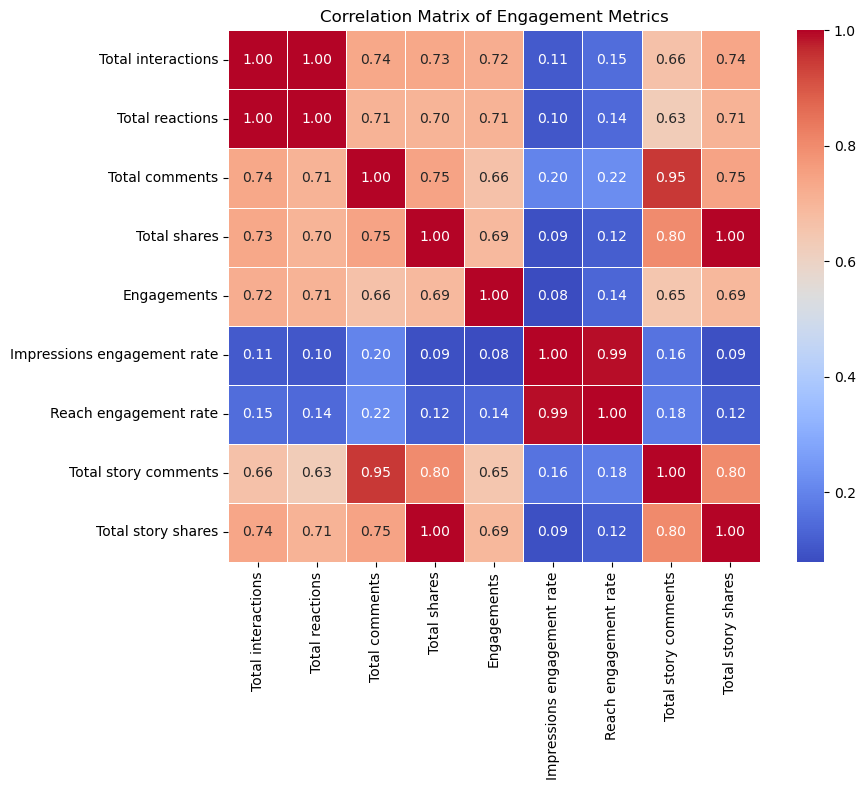

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seleziona le colonne di interesse
engagement_vars = [
    'Total interactions', 'Total reactions', 'Total comments',
    'Total shares', 'Engagements', 'Impressions engagement rate',
    'Reach engagement rate', 'Total story comments', 'Total story shares'
]

# Calcolo matrice di correlazione
corr_matrix = engagement_df[engagement_vars].corr()

# Plot della matrice di correlazione
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix of Engagement Metrics")
plt.tight_layout()
plt.show()


In [38]:
# Rimozione delle metriche fortemente collineari
redundant_columns = [
    'Total reactions',
    'Total story comments',
    'Total story shares',
    'Reach engagement rate'
]

engagement_df = engagement_df.drop(columns=redundant_columns)


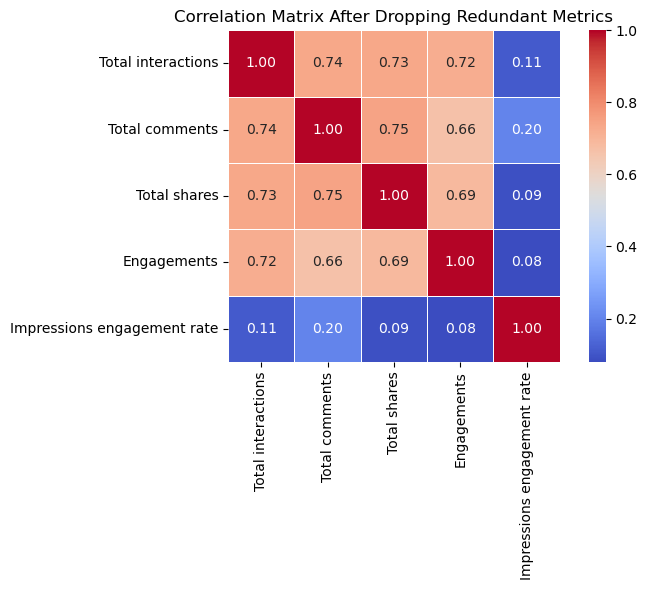

In [39]:
remaining_vars = [
    'Total interactions', 'Total comments', 'Total shares',
    'Engagements', 'Impressions engagement rate'
]

# Correlation matrix aggiornata
corr_matrix_reduced = engagement_df[remaining_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_reduced, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix After Dropping Redundant Metrics")
plt.tight_layout()
plt.show()

# 😀🔥 **Engagement: Causal Effects** 💬📊  


### 📊 **Initial Regression: Paid vs. Log Engagements**  

The first regression in this section, mirroring the approach used for **reach** and **impressions**, focused solely on the impact of **paid** content on **log engagements**.  

The results were immediately clear – **paid** content has a **much smaller influence** on **log engagements**, with an adjusted **R-squared** of just **0.14**.  

This suggests that while **paid** boosts reach, the effect on **engagement** is not as strong, indicating that **Aprilia** might benefit from further optimizing its **content quality** or **ad spend** to more effectively capture audience interactions. 💬📉🛠️  


In [40]:
import statsmodels.formula.api as smf

# Crea una copia del DataFrame con nome variabile semplificato
df = engagement_df.rename(columns={'Has paid': 'Has_paid'})

# Modello semplice con robust SE
model = smf.ols('log_engagements ~ C(Has_paid)', data=df).fit(cov_type='HC1')

# Output
print("\n📊 Regressione semplice:\n")
print(model.summary())


📊 Regressione semplice:

                            OLS Regression Results                            
Dep. Variable:        log_engagements   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     167.2
Date:                Sat, 10 May 2025   Prob (F-statistic):           8.45e-36
Time:                        23:24:33   Log-Likelihood:                -1911.9
No. Observations:                1150   AIC:                             3828.
Df Residuals:                    1148   BIC:                             3838.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept     

### 🚀 **Digging Deeper: Full Model for Engagement Causal Effects**  

After observing the **limited explanatory power** of **paid** content on its own, we expanded the regression models to include **all possible covariates** to see if we could significantly **boost** the **adjusted R-squared**.   

### **Key Findings:**
- For **log_engagements**, the full model reached an **adjusted R-squared** above **36%**, a significant improvement.  
- **Photos**, **links**, and **videos** had **positive** and **strategically significant** impacts, while **status** updates consistently **underperformed**, reflecting the lower engagement potential of this media type.  
- Posts showcasing **accessories** generally had a **negative** effect, suggesting that content focusing on **Aprilia's core products** resonates more strongly with audiences. 🏁  
- An interesting outlier is the **urban** product category, which showed a **negative effect** on **log_shares**, potentially indicating a weaker community presence or brand affinity in this segment.  

### **Impact of Paid Content:**
- Despite its weaker standalone performance, **has_paid** maintained a **positive** and **significant** effect across all engagement metrics:  
    - **Log_Engagements:** **+3.85**  
    - **Log_Interactions:** **+2.87**  
    - **Log_Shares** and **Log_Comments:** Below **2**, reflecting a relatively **smaller impact** on these specific metrics.  

### **Engagement Rate – A Different Story:**  
- Interestingly, for **engagement rate**, the effect of **paid** is actually **negative**, aligning with our earlier observation that higher reach doesn't necessarily translate to proportional engagement. 📉  
- **Racing content** has a **positive** and **significant** effect, highlighting its potential to drive stronger audience involvement. 🏁  
- In contrast, **accessories** continue to **underperform**, dragging down the **impressions engagement rate**.  
- No significant effects were found for any of the **product groups**, reinforcing the idea that the **type** of content (e.g., racing vs. general product) is more critical in driving engagement than the specific product category.  
- Finally, **weekend posts** tend to have a positive effect, likely reflecting the overlap with race days, which generally generate higher audience interest. 🏁🗓️  

This consistency across **logged variables** suggests that while **paid** content clearly boosts **engagement**, the **type** of media and **product focus** remain crucial for maximizing audience interaction. 💥📊  


In [41]:
import statsmodels.formula.api as smf

# Rinomina colonne per uso in formula
df = engagement_df.rename(columns={
    'Has paid': 'Has_paid',
    'Acc yes/no': 'Acc_yes_no',
    'Event yes/no': 'Event_yes_no',
    'Racing yes/no': 'Racing_yes_no',
    'Product group': 'Product_group'
})

# Prepara il DataFrame ordinato e calcola il lag
df_time = df.copy()
df_time = df_time.sort_values(by=['Date', 'Time']).copy()
df_time['lag_log_engagements'] = df_time['log_engagements'].shift(1)
df_time = df_time.dropna(subset=['lag_log_engagements'])

# Formula estesa con lag
formula_calendar_lag = (
    'log_engagements ~ lag_log_engagements + '
    'C(Has_paid) + C(Media) + C(Acc_yes_no) + '
    'C(Event_yes_no) + C(Racing_yes_no) + C(Product_group) + '
    'C(Time_cluster) + C(Month) + C(Weekday)'
)

# Fit modello con robust SE
model_calendar_lag = smf.ols(formula=formula_calendar_lag, data=df_time).fit(cov_type='HC1')

# Output
print("\n📊 Regressione con calendario + lag (log_engagements):\n")
print(model_calendar_lag.summary())



📊 Regressione con calendario + lag (log_engagements):

                            OLS Regression Results                            
Dep. Variable:        log_engagements   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     273.0
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        23:24:33   Log-Likelihood:                -1720.3
No. Observations:                1149   AIC:                             3509.
Df Residuals:                    1115   BIC:                             3680.
Df Model:                          33                                         
Covariance Type:                  HC1                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------

In [42]:
import numpy as np

# Crea colonne log(x + 1) per ciascuna metrica
df_time['log_interactions'] = np.log(df_time['Total interactions'] + 1)
df_time['log_comments'] = np.log(df_time['Total comments'] + 1)
df_time['log_shares'] = np.log(df_time['Total shares'] + 1)

# Visualizza per controllo
df_time[['log_interactions', 'log_comments', 'log_shares']].head()


,log_interactions,log_comments,log_shares
1,7.118016,4.488636,4.174387
2,6.669498,3.871201,2.302585
3,5.866468,1.386294,2.890372
4,8.217169,5.899897,4.219508
5,6.496775,2.079442,4.007333


In [43]:
import statsmodels.formula.api as smf

# Lista delle variabili target e creazione delle rispettive lag
target_vars = ['log_interactions', 'log_comments', 'log_shares']

# Crea le variabili di lag nel dataframe
df_time = df_time.sort_values(by=['Date', 'Time']).copy()
for var in target_vars:
    df_time[f'lag_{var}'] = df_time[var].shift(1)

# Rimuove righe con NaN dovuti al lag
df_time = df_time.dropna(subset=[f'lag_{var}' for var in target_vars])

# Parte fissa della formula
covariates = (
    'C(Has_paid) + C(Media) + C(Acc_yes_no) + '
    'C(Event_yes_no) + C(Racing_yes_no) + C(Product_group) + '
    'C(Time_cluster) + C(Month) + C(Weekday)'
)

# Esegui regressione per ogni variabile con lag
for var in target_vars:
    formula = f'{var} ~ lag_{var} + {covariates}'
    print(f"\n📊 Regressione con lag — variabile dipendente: {var}\n")
    model = smf.ols(formula=formula, data=df_time).fit(cov_type='HC1')
    print(model.summary())



📊 Regressione con lag — variabile dipendente: log_interactions

                            OLS Regression Results                            
Dep. Variable:       log_interactions   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     279.2
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        23:24:33   Log-Likelihood:                -1593.3
No. Observations:                1148   AIC:                             3255.
Df Residuals:                    1114   BIC:                             3426.
Df Model:                          33                                         
Covariance Type:                  HC1                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

In [44]:
import numpy as np
import statsmodels.formula.api as smf

# Clippa e calcola logit
df_time = df_time.copy()
df_time['eng_rate_clipped'] = df_time['Impressions engagement rate'].clip(0.000001, 0.999999)
df_time['logit_engagement_rate'] = np.log(df_time['eng_rate_clipped'] / (1 - df_time['eng_rate_clipped']))

# Calcola il lag della logit engagement rate
df_time['lag_logit_engagement_rate'] = df_time['logit_engagement_rate'].shift(1)

# Rimuove righe con NaN nella lag
df_model = df_time.dropna(subset=['lag_logit_engagement_rate'])

# Formula
formula = (
    'logit_engagement_rate ~ lag_logit_engagement_rate + '
    'C(Has_paid) + C(Media) + C(Acc_yes_no) + C(Event_yes_no) + '
    'C(Racing_yes_no) + C(Product_group) + C(Time_cluster) + '
    'C(Month) + C(Weekday)'
)

# Fit del modello
model = smf.ols(formula=formula, data=df_model).fit(cov_type='HC1')

# Output
print("\n📊 Regressione logit — Impressions engagement rate (con lag della stessa variabile):")
print(model.summary())



📊 Regressione logit — Impressions engagement rate (con lag della stessa variabile):
                              OLS Regression Results                             
Dep. Variable:     logit_engagement_rate   R-squared:                       0.503
Model:                               OLS   Adj. R-squared:                  0.488
Method:                    Least Squares   F-statistic:                     106.7
Date:                   Sat, 10 May 2025   Prob (F-statistic):          2.61e-317
Time:                           23:24:33   Log-Likelihood:                -1465.1
No. Observations:                   1147   AIC:                             2998.
Df Residuals:                       1113   BIC:                             3170.
Df Model:                             33                                         
Covariance Type:                     HC1                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
-

# 👉 **Clicks: Specific EDA** 🖱️

### ⏰ **Time Clustering and Variable Cleanup**  

As in the previous analyses, the **time clustering** approach was applied here as well, grouping posts into **morning** (8-12), **afternoon** (12-16), **evening** (16-21), and **night / early morning** (21-8) clusters.  

Additionally, media types with **null values** across all **click** and **view** columns were **dropped** to clean the dataset and avoid introducing bias.  

One noteworthy observation is the **strong overall correlation** between **Post Clicks**, **Photo Views**, and, to a lesser extent, **Other Clicks**. Interestingly, **Link Clicks** appears to **behave differently**, suggesting a distinct interaction pattern for this type of metric


In [45]:
click_cols = ['Post clicks', 'Photo views', 'Link clicks', 'Other clicks']
zero_counts = click_df[click_cols].apply(lambda col: (col == 0).sum()) 
print(zero_counts)

Post clicks     4
Photo views     0
Link clicks     0
Other clicks    0
dtype: int64


In [46]:
# Identifica le righe con NaN in Photo views
nan_post_clicks = click_df['Post clicks'].isna()

# Verifica se tutte quelle righe hanno Media == 3
if (click_df.loc[nan_post_clicks, 'Media'] == 3).all():
    click_df = click_df[~nan_post_clicks]
    print("✅ Righe con NaN in 'Photo views' e Media == 3 eliminate.")
else:
    print("⚠️ Alcune righe con NaN in 'Photo views' NON hanno Media == 3. Nessuna eliminazione eseguita.")
## we are eliminating all the reels as they present NaNs for all the variables of interest

✅ Righe con NaN in 'Photo views' e Media == 3 eliminate.


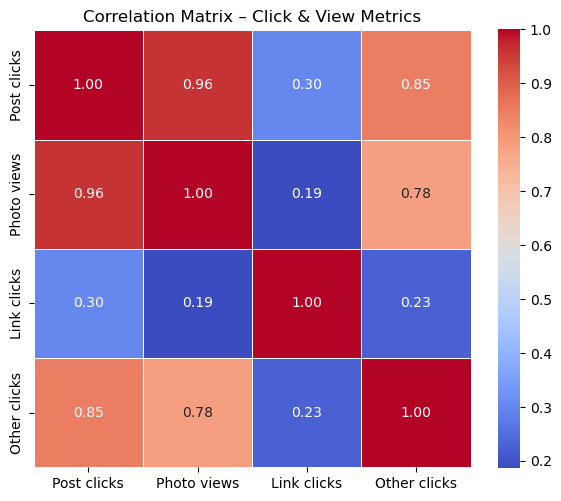

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ricostruzione del DataFrame se necessario
base_columns = ['Date', 'Time', 'Has paid', 'Media', 'Acc yes/no', 'Event yes/no',
                'Racing yes/no', 'Product group']
click_columns = ['Post clicks', 'Photo views', 'Link clicks', 'Other clicks']


# Seleziona le colonne per la correlazione
click_cols = ['Post clicks', 'Photo views', 'Link clicks', 'Other clicks']
corr_matrix = click_df[click_cols].corr()

# Plot della heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix – Click & View Metrics")
plt.tight_layout()
plt.show()


In [48]:
import pandas as pd
import numpy as np

# Calcolo componenti temporali
click_df['Date'] = pd.to_datetime(click_df['Date'], errors='coerce')
click_df['Time'] = pd.to_datetime(click_df['Time'], format='%H:%M:%S', errors='coerce')

click_df['Month'] = click_df['Date'].dt.month
click_df['Weekday'] = click_df['Date'].dt.dayofweek
click_df['Days_since_start'] = (click_df['Date'] - click_df['Date'].min()).dt.days
click_df['Hour'] = click_df['Time'].dt.hour + click_df['Time'].dt.minute / 60

# Crea log_clicks come proxy per "activity"
click_df['log_clicks'] = np.log(click_df['Post clicks'] + 1)

# Definisci i cluster temporali
def assign_time_cluster(hour):
    if 8 <= hour < 12:
        return 0  # Morning
    elif 12 <= hour < 16:
        return 1  # Afternoon
    elif 16 <= hour < 21:
        return 2  # Evening
    else:
        return 3  # Night / Early Morning

# Applica la funzione di clustering
click_df['Time_cluster'] = click_df['Hour'].apply(assign_time_cluster)


In [49]:
import numpy as np

# Crea colonne log(x + 1) per evitare log(0)
click_df['log_photo_views'] = np.log(click_df['Photo views'] + 1)
click_df['log_link_clicks'] = np.log(click_df['Link clicks'] + 1)
click_df['log_other_clicks'] = np.log(click_df['Other clicks'] + 1)
click_df['log_post_clicks'] = np.log(click_df['Post clicks'] + 1)

# Visualizza per conferma
click_df[['log_post_clicks','log_photo_views', 'log_link_clicks', 'log_other_clicks']].head()


,log_post_clicks,log_photo_views,log_link_clicks,log_other_clicks
0,5.347108,NaN,NaN,4.605170
1,9.356862,NaN,1.098612,8.657651
2,6.320768,4.262680,NaN,6.186209
3,8.216628,NaN,1.791759,6.793466
4,8.941415,7.214504,2.397895,8.744169


In [50]:
# Crea variabili categoriche binarie basate sulla presenza o meno di valori
click_df['Link_clicks_present'] = click_df['Link clicks'].notna().astype(int)
click_df['Other_clicks_present'] = click_df['Other clicks'].notna().astype(int)

# Verifica il risultato
click_df[['Link clicks', 'Link_clicks_present', 'Other clicks', 'Other_clicks_present']].head()


,Link clicks,Link_clicks_present,Other clicks,Other_clicks_present
0,NaN,0,99.0,1
1,2.0,1,5753.0,1
2,NaN,0,485.0,1
3,5.0,1,891.0,1
4,10.0,1,6273.0,1


In [51]:
set(click_df['Media'].values) ##Reels have been eliminated

{0, 1, 2, 4, 5}

In [52]:
# Rimappa i valori della colonna Media
media_map = {
    4: 3,
    5: 4
}

click_df['Media'] = click_df['Media'].replace(media_map)

# 👉 **Clicks: Causal Effects** 🖱️

### 🚀 **Regression Insights: Paid, Product Types, and Time Clusters**  

Across all tested regressions, **has_paid** consistently showed a **positive** contribution to the dependent metrics.  

### **Key Observations:**  
- **Accessory Posts:** Once again, content featuring **accessories** performed **significantly worse** across the board, with a highly significant negative coefficient. This reinforces the idea that **core products** drive more meaningful engagement. 🛑🧢  
- **Racing Content:** As expected, **racing content** continued to deliver **strong** positive effects on **Other Clicks**, **Log Photo Views**, and **Log Post Clicks**, further highlighting the power of this content type to capture audience attention. 🏁📈  
- **Evening Advantage:** Interestingly, the **evening time cluster** contributed **positively** (though modestly) to all three dependent variables. This likely reflects the tendency for users to engage more deeply with their interests during evening hours, when they have more free time. 🌆📱  

### **Testing the Momentum Effect:**  
Finally, **lagged variables** were added to the models to test the momentum hypothesis, but these failed to produce **meaningful** improvements, suggesting that **past performance** alone is not a strong predictor of future click-based engagement in this context. 🔄📉  


In [53]:
# Rinomina le colonne in click_df per compatibilità con formula
click_df = click_df.rename(columns={
    'Has paid': 'Has_paid',
    'Acc yes/no': 'Acc_yes_no',
    'Event yes/no': 'Event_yes_no',
    'Racing yes/no': 'Racing_yes_no',
    'Product group': 'Product_Group'
})


In [54]:
click_df = click_df.drop(columns=['log_clicks'])

In [55]:
import statsmodels.formula.api as smf

# Ordina e crea la colonna di lag
click_df = click_df.sort_values(by=['Date', 'Time']).copy()
click_df['lag_log_post_clicks'] = click_df['log_post_clicks'].shift(1)

# Rimuove righe con NaN nella lag
df_model = click_df.dropna(subset=['lag_log_post_clicks'])

# Formula completa con variabili indipendenti richieste
formula = (
    'log_post_clicks ~ lag_log_post_clicks + '
    'C(Has_paid) + C(Media) + C(Acc_yes_no) + C(Event_yes_no) + '
    'C(Racing_yes_no) + C(Product_Group) + C(Time_cluster) + '
    'C(Month) + C(Weekday) + C(Link_clicks_present)'
)

# Fit del modello
model = smf.ols(formula=formula, data=df_model).fit(cov_type='HC1')

# Output
print("\n📊 Regressione con lag e controlli temporali — log_post_clicks\n")
print(model.summary())



📊 Regressione con lag e controlli temporali — log_post_clicks

                            OLS Regression Results                            
Dep. Variable:        log_post_clicks   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     206.0
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        23:24:34   Log-Likelihood:                -1848.3
No. Observations:                1137   AIC:                             3765.
Df Residuals:                    1103   BIC:                             3936.
Df Model:                          33                                         
Covariance Type:                  HC1                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

In [56]:
photo_views = click_df[click_df['Photo views'].notna()]
photo_views[photo_views['Media'] == 4]

,Date,Time,Has_paid,Media,Acc_yes_no,Event_yes_no,Racing_yes_no,Product_Group,Post clicks,Photo views,...,Days_since_start,Hour,Time_cluster,log_photo_views,log_link_clicks,log_other_clicks,log_post_clicks,Link_clicks_present,Other_clicks_present,lag_log_post_clicks
1022,2024-11-06,1900-01-01 14:54:17,0,4,0,1,0,2,1002.0,754.0,...,675,14.9,1,6.626718,NaN,5.517453,6.910751,0,1,5.717028


In [57]:
photo_views = photo_views.drop(columns=['Media'])

# Ordina e crea la colonna di lag
photo_views = photo_views.sort_values(by=['Date', 'Time']).copy()
photo_views['lag_log_photo_views'] = photo_views['log_photo_views'].shift(1)

# Rimuove righe con NaN nella lag
df_model = photo_views.dropna(subset=['lag_log_photo_views'])

# Formula completa con variabili indipendenti richieste
formula = (
    'log_photo_views ~ lag_log_photo_views + '
    'C(Has_paid) + C(Acc_yes_no) + C(Event_yes_no) + '
    'C(Racing_yes_no) + C(Product_Group) + C(Time_cluster) + '
    'C(Month) + C(Weekday) + C(Link_clicks_present)'
)

# Fit del modello
model = smf.ols(formula=formula, data=df_model).fit(cov_type='HC1')

# Output
print("📊 Regressione con lag e controlli temporali — log_photo_views")
print(model.summary())

📊 Regressione con lag e controlli temporali — log_photo_views
                            OLS Regression Results                            
Dep. Variable:        log_photo_views   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     3.923
Date:                Sat, 10 May 2025   Prob (F-statistic):           6.72e-11
Time:                        23:24:34   Log-Likelihood:                -1251.0
No. Observations:                 703   AIC:                             2562.
Df Residuals:                     673   BIC:                             2699.
Df Model:                          29                                         
Covariance Type:                  HC1                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

In [58]:
import statsmodels.formula.api as smf

other_clicks = click_df[click_df['Other clicks'].notna()]

# Ordina e crea la colonna di lag
other_clicks = other_clicks.sort_values(by=['Date', 'Time']).copy()
other_clicks['lag_log_other_clicks'] = other_clicks['log_other_clicks'].shift(1)

# Rimuove righe con NaN nella lag
df_model = other_clicks.dropna(subset=['lag_log_other_clicks'])

# Formula completa
formula = (
    'log_other_clicks ~ lag_log_other_clicks + '
    'C(Has_paid) + C(Media) + C(Acc_yes_no) + C(Event_yes_no) + '
    'C(Racing_yes_no) + C(Product_Group) + C(Time_cluster) + '
    'C(Month) + C(Weekday) + C(Link_clicks_present)'
)

# Fit modello con robust SE
model = smf.ols(formula=formula, data=df_model).fit(cov_type='HC1')

# Output
print("📊 Regressione con lag e controlli — log_other_clicks")
print(model.summary())


📊 Regressione con lag e controlli — log_other_clicks
                            OLS Regression Results                            
Dep. Variable:       log_other_clicks   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     382.9
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        23:24:34   Log-Likelihood:                -1842.4
No. Observations:                1131   AIC:                             3753.
Df Residuals:                    1097   BIC:                             3924.
Df Model:                          33                                         
Covariance Type:                  HC1                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------

# 🎥 **Videos: Specific Eda** ⏱️

### 🎥 **Video Data: Focused Analysis**  

For the **video** analysis, it is intuitively clear that **Total Video Views** are **highly correlated** with **Unique Views**, as both metrics capture essentially the same type of user interaction.  

Given this, the analysis was focused exclusively on posts containing **video content**, with all other rows excluded to ensure a **cleaner, more meaningful** dataset. 📹


In [59]:
# Rimuove righe con NaN in 'Video view count'
video_df_filtro = video_df.dropna(subset=['Video view count'])

# Verifica
print(f"✅ Righe rimanenti dopo il drop: {len(video_df_filtro)}")

✅ Righe rimanenti dopo il drop: 433


In [60]:
# Elenco delle colonne da eliminare
cols_to_drop = [
    'Views - paid', 'Views - organic', 'Completed video views',
    'Average completion (%)', 'Average time watched (sec)', 'Total video view time (sec)'
]

# Rimozione colonne
video_df_filtro = video_df_filtro.drop(columns=cols_to_drop)

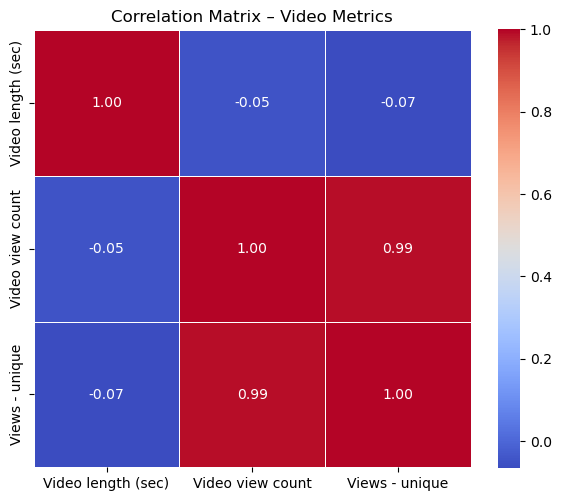

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Colonne da analizzare
video_corr_cols = ['Video length (sec)', 'Video view count', 'Views - unique']

# Calcolo e plot
corr_matrix = video_df_filtro[video_corr_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix – Video Metrics")
plt.tight_layout()
plt.show()


In [62]:
import numpy as np
import pandas as pd

# Rinomina colonne per compatibilità
video_df_filtro = video_df_filtro.rename(columns={
    'Has paid': 'Has_paid',
    'Acc yes/no': 'Acc_yes_no',
    'Event yes/no': 'Event_yes_no',
    'Racing yes/no': 'Racing_yes_no',
    'Product group': 'Product_group',
    'Video length (sec)': 'Video_length_sec',
    'Video view count': 'Video_view_count',
    'Views - unique': 'Views_unique'
})

# Gestione variabili temporali
video_df_filtro['Date'] = pd.to_datetime(video_df_filtro['Date'], errors='coerce')
video_df_filtro['Time'] = pd.to_datetime(video_df_filtro['Time'], format='%H:%M:%S', errors='coerce')
video_df_filtro['Month'] = video_df_filtro['Date'].dt.month
video_df_filtro['Weekday'] = video_df_filtro['Date'].dt.dayofweek
video_df_filtro['Days_since_start'] = (video_df_filtro['Date'] - video_df_filtro['Date'].min()).dt.days
video_df_filtro['Hour'] = video_df_filtro['Time'].dt.hour + video_df_filtro['Time'].dt.minute / 60

# Trasformazioni log
video_df_filtro['log_video_views'] = np.log(video_df_filtro['Video_view_count'] + 1)
video_df_filtro['log_views_unique'] = np.log(video_df_filtro['Views_unique'] + 1)

# Lag
video_df_filtro = video_df_filtro.sort_values(by='Date')
video_df_filtro['lag_log_video_views'] = video_df_filtro['log_video_views'].shift(1)
video_df_filtro['lag_log_views_unique'] = video_df_filtro['log_views_unique'].shift(1)


In [63]:
import pandas as pd
import numpy as np

# Ensure Hour is calculated if not present
if 'Hour' not in video_df_filtro.columns or video_df_filtro['Hour'].isna().any():
    video_df_filtro['Hour'] = video_df_filtro['Time'].dt.hour + video_df_filtro['Time'].dt.minute / 60

# Define time clustering function
def assign_time_cluster(hour):
    if 8 <= hour < 12:
        return 0  # Morning
    elif 12 <= hour < 16:
        return 1  # Afternoon
    elif 16 <= hour < 21:
        return 2  # Evening
    else:
        return 3  # Night / Early Morning

# Apply the clustering function
video_df_filtro['time_cluster'] = video_df_filtro['Hour'].apply(assign_time_cluster)

# Ensure the cluster column is properly typed
video_df_filtro['time_cluster'] = video_df_filtro['time_cluster'].astype('Int64')

# 🎥 **Videos: Causal Effects** ⏱️

### 🚀 **Running Full Models: Total Views and Unique Views**  

In this section, we chose to **run the regressions directly** with **all available covariates** included.  

### **Key Observations:**  
- **High Adjusted R-squared:** Both the **Total Views** and **Unique Views** models achieved **high adjusted R-squared** values, indicating a strong overall fit and **good explanatory power**. 📊  
- **Paid Power:** **Has paid** showed **highly positive** coefficients (above **3.5**) and **strong statistical significance** in both models, reinforcing the importance of **paid content** in expanding reach. 💥  
- **Content Type Matters:** As seen before, **accessory posts** continued to **underperform**, while **racing content** had **positive and significant** effects, reflecting the power of these high-impact, fan-favorite topics. 🏁📈  
- **Week Problem:** Adding **week variables** to this model introduced **multicollinearity** issues, likely due to strong overlap with other temporal features. Given their **minimal impact** in previous models, we opted to **exclude** them, already satisfied with the model's performance without these variables. ✅  


In [64]:
import statsmodels.formula.api as smf

# Variabili necessarie
regression_vars_views = [
    'log_video_views', 'lag_log_video_views',
    'Has_paid', 'Acc_yes_no', 'Event_yes_no', 'Racing_yes_no',
    'Product_group', 'time_cluster', 'Month'
]

regression_vars_unique = [
    'log_views_unique', 'lag_log_views_unique',
    'Has_paid', 'Acc_yes_no', 'Event_yes_no', 'Racing_yes_no',
    'Product_group', 'time_cluster', 'Month'
]

# DataFrame per log_video_views
df_views = video_df_filtro.dropna(subset=regression_vars_views).copy()
df_views['time_cluster'] = df_views['time_cluster'].astype(int)
df_views['Month'] = df_views['Month'].astype(int)

# DataFrame per log_views_unique
df_unique = video_df_filtro.dropna(subset=regression_vars_unique).copy()
df_unique['time_cluster'] = df_unique['time_cluster'].astype(int)
df_unique['Month'] = df_unique['Month'].astype(int)

# Formula base
base_formula = (
    'C(Has_paid) + C(Acc_yes_no) + C(Event_yes_no) + '
    'C(Racing_yes_no) + C(Product_group) + C(time_cluster) + C(Month)'
)

# Regressione log_video_views con lag coerente
formula_views = f'log_video_views ~ {base_formula} + lag_log_video_views'
model_views = smf.ols(formula=formula_views, data=df_views).fit(cov_type='HC1')
print("📊 Regressione log_video_views (lag coerente):")
print(model_views.summary())

# Regressione log_views_unique con lag coerente
formula_unique = f'log_views_unique ~ {base_formula} + lag_log_views_unique'
model_unique = smf.ols(formula=formula_unique, data=df_unique).fit(cov_type='HC1')
print("\n📊 Regressione log_views_unique (lag coerente):")
print(model_unique.summary())


📊 Regressione log_video_views (lag coerente):
                            OLS Regression Results                            
Dep. Variable:        log_video_views   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     123.2
Date:                Sat, 10 May 2025   Prob (F-statistic):          4.40e-165
Time:                        23:24:34   Log-Likelihood:                -709.01
No. Observations:                 432   AIC:                             1464.
Df Residuals:                     409   BIC:                             1558.
Df Model:                          22                                         
Covariance Type:                  HC1                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

# 🚀 **Best Variables and Interaction Effects** 🚀

### **🔍 Final Model Testing: Focus on Significant Variables**  

As a final step, we tested all models using only the **most statistically significant** variables, adding **interaction terms** with **paid** where appropriate.  

---

#### **📊 Impressions:**  
- **No significant results**, making it difficult to draw any concrete conclusions regarding the interaction between **paid** and **product types**, or between **paid** and **racing** vs. **non-racing** content.  

---

#### **📊 Log_Engagements:**  
- A similar pattern was observed, with **no statistically significant** interactions identified, limiting the ability to isolate any meaningful combined effects.  

---

#### **📊 Clicks:**  
- There was a **significant** interaction between **paid** and **accessories**.  
- **Paid posts** featuring **accessories** had a **negative** impact on the **baseline**, suggesting that this combination might actually **detract** from engagement. 🛑🧢  

---

#### **📊 Videos:**  
- Interestingly, the **interaction** between **paid** and **racing content** produced a **negative** coefficient, indicating that **racing videos** may be **strong enough** on their own, without requiring the additional boost of paid promotion. 🏁📉  


In [65]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Ordina per tempo
df = r_i_df.sort_values(by=['Date', 'Time']).copy()

# Log-transform delle impressions
df['log_impressions'] = np.log(df['Total impressions'] + 1)

# Rinomina colonne per compatibilità formula
df = df.rename(columns={
    'Has paid': 'Has_paid',
    'Acc yes/no': 'Acc_yes_no',
    'Event yes/no': 'Event_yes_no',
    'Racing yes/no': 'Racing_yes_no',
    'Product group': 'Product_group'
})

# Rimuove righe con valori mancanti
df = df.dropna()

# Formula con interaction terms e covariate categoriche
formula = (
    'log_impressions ~ C(Has_paid) + C(Media) + C(Product_group) + '
    'C(Acc_yes_no) + C(Event_yes_no) + C(Racing_yes_no) + '
    'C(Has_paid) * C(Acc_yes_no) + '
    'C(Has_paid) * C(Racing_yes_no) + '
    'C(Has_paid) * C(Product_group)'
    
)

# Fit del modello con robust SE
model = smf.ols(formula=formula, data=df).fit(cov_type='HC1')

# Output
print("\n📌 MODELLO CON INTERAZIONI (log Total Impressions):\n")
print(model.summary())



📌 MODELLO CON INTERAZIONI (log Total Impressions):

                            OLS Regression Results                            
Dep. Variable:        log_impressions   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     488.0
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        23:24:34   Log-Likelihood:                -1565.5
No. Observations:                1150   AIC:                             3167.
Df Residuals:                    1132   BIC:                             3258.
Df Model:                          17                                         
Covariance Type:                  HC1                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

In [66]:
import statsmodels.formula.api as smf

# Lista delle variabili target
target_vars = ['log_engagements']

# Rimuove righe con NaN (solo per le variabili target)
df_time = df_time.dropna(subset=target_vars).copy()

# Parte fissa della formula (con variabili temporali)
covariates = (
    'C(Has_paid) + C(Media) + C(Acc_yes_no) + '
    'C(Racing_yes_no) + C(Product_group) + '
    'C(Time_cluster) + C(Month) + C(Weekday) + '
    'C(Has_paid) * C(Acc_yes_no) + '
    'C(Has_paid) * C(Racing_yes_no) + '
    'C(Has_paid) * C(Product_group)'
)
# Esegui regressione per ogni variabile (senza lag ma con tempo)
for var in target_vars:
    formula = f'{var} ~ {covariates}'
    print(f"\n📊 Regressione con variabili temporali — variabile dipendente: {var}\n")
    model = smf.ols(formula=formula, data=df_time).fit(cov_type='HC1')
    print(model.summary())




📊 Regressione con variabili temporali — variabile dipendente: log_engagements

                            OLS Regression Results                            
Dep. Variable:        log_engagements   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     242.7
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        23:24:34   Log-Likelihood:                -1735.4
No. Observations:                1148   AIC:                             3545.
Df Residuals:                    1111   BIC:                             3731.
Df Model:                          36                                         
Covariance Type:                  HC1                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

In [67]:
import statsmodels.formula.api as smf

# Ordina il dataframe per tempo
click_df = click_df.sort_values(by=['Date', 'Time']).copy()

# Rimuove righe con NaN nelle variabili target
df_model = click_df.dropna(subset=['log_post_clicks'])

# Formula completa con interazioni e variabili temporali
formula = (
    'log_post_clicks ~ '
    'C(Has_paid) + C(Media) + C(Acc_yes_no) + '
    'C(Event_yes_no) + C(Racing_yes_no) + C(Product_Group) + '
    'C(Time_cluster) + C(Month) + C(Weekday) + C(Link_clicks_present) + '
    'C(Has_paid) * C(Acc_yes_no) + '
    'C(Has_paid) * C(Racing_yes_no) + '
    'C(Has_paid) * C(Product_Group)'
)

# Fit del modello con robust SE
model = smf.ols(formula=formula, data=df_model).fit(cov_type='HC1')

# Output
print("\n📊 Regressione con interazioni e controlli temporali — log_post_clicks\n")
print(model.summary())



📊 Regressione con interazioni e controlli temporali — log_post_clicks

                            OLS Regression Results                            
Dep. Variable:        log_post_clicks   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     180.4
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        23:24:34   Log-Likelihood:                -1859.6
No. Observations:                1138   AIC:                             3795.
Df Residuals:                    1100   BIC:                             3987.
Df Model:                          37                                         
Covariance Type:                  HC1                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

In [68]:
import statsmodels.formula.api as smf

# Variabili necessarie (senza lag)
regression_vars_views = [
    'log_video_views', 'Has_paid', 'Acc_yes_no', 'Event_yes_no',
    'Racing_yes_no', 'Product_group', 'time_cluster', 'Month'
]

regression_vars_unique = [
    'log_views_unique', 'Has_paid', 'Acc_yes_no', 'Event_yes_no',
    'Racing_yes_no', 'Product_group', 'time_cluster', 'Month'
]

# DataFrame per log_video_views
df_views = video_df_filtro.dropna(subset=regression_vars_views).copy()
df_views['time_cluster'] = df_views['time_cluster'].astype(int)
df_views['Month'] = df_views['Month'].astype(int)

# DataFrame per log_views_unique
df_unique = video_df_filtro.dropna(subset=regression_vars_unique).copy()
df_unique['time_cluster'] = df_unique['time_cluster'].astype(int)
df_unique['Month'] = df_unique['Month'].astype(int)

# Formula base con interazioni
base_formula = (
    'C(Has_paid) + C(Acc_yes_no) + C(Event_yes_no) + '
    'C(Racing_yes_no) + C(time_cluster) + C(Month) + '
    'C(Has_paid) * C(Acc_yes_no) + '
    'C(Has_paid) * C(Racing_yes_no)'
)

# Regressione log_video_views senza lag
formula_views = f'log_video_views ~ {base_formula}'
model_views = smf.ols(formula=formula_views, data=df_views).fit(cov_type='HC1')
print("\n📊 Regressione log_video_views (senza lag):")
print(model_views.summary())

# Regressione log_views_unique senza lag
formula_unique = f'log_views_unique ~ {base_formula}'
model_unique = smf.ols(formula=formula_unique, data=df_unique).fit(cov_type='HC1')
print("\n📊 Regressione log_views_unique (senza lag):")
print(model_unique.summary())



📊 Regressione log_video_views (senza lag):
                            OLS Regression Results                            
Dep. Variable:        log_video_views   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     55.03
Date:                Sat, 10 May 2025   Prob (F-statistic):          5.84e-103
Time:                        23:24:34   Log-Likelihood:                -707.02
No. Observations:                 433   AIC:                             1456.
Df Residuals:                     412   BIC:                             1542.
Df Model:                          20                                         
Covariance Type:                  HC1                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------